<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NIRISS-WFSS-test" data-toc-modified-id="NIRISS-WFSS-test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NIRISS WFSS test</a></span><ul class="toc-item"><li><span><a href="#Disk-usage" data-toc-modified-id="Disk-usage-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Disk usage</a></span></li></ul></li><li><span><a href="#Parse-Visits" data-toc-modified-id="Parse-Visits-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parse Visits</a></span></li><li><span><a href="#Run-the-preprocessing-scripts" data-toc-modified-id="Run-the-preprocessing-scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Run the preprocessing scripts</a></span><ul class="toc-item"><li><span><a href="#Use-reference-astrometry" data-toc-modified-id="Use-reference-astrometry-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Use reference astrometry</a></span></li></ul></li><li><span><a href="#Drizzle-full-mosaics" data-toc-modified-id="Drizzle-full-mosaics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Drizzle full mosaics</a></span><ul class="toc-item"><li><span><a href="#RGB-mosaic" data-toc-modified-id="RGB-mosaic-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>RGB mosaic</a></span></li></ul></li><li><span><a href="#Multiwavelength-catalog" data-toc-modified-id="Multiwavelength-catalog-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Multiwavelength catalog</a></span><ul class="toc-item"><li><span><a href="#Catalog-detection-image" data-toc-modified-id="Catalog-detection-image-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Catalog detection image</a></span></li><li><span><a href="#Source-detection-and-aperture-photometry" data-toc-modified-id="Source-detection-and-aperture-photometry-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Source detection and aperture photometry</a></span></li><li><span><a href="#Compare-astrometry" data-toc-modified-id="Compare-astrometry-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Compare astrometry</a></span></li></ul></li><li><span><a href="#Grism-model" data-toc-modified-id="Grism-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Grism model</a></span><ul class="toc-item"><li><span><a href="#Previews-of-combined-grism-images" data-toc-modified-id="Previews-of-combined-grism-images-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Previews of combined grism images</a></span></li></ul></li><li><span><a href="#Extract-spectra" data-toc-modified-id="Extract-spectra-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Extract spectra</a></span><ul class="toc-item"><li><span><a href="#Redshift-fit" data-toc-modified-id="Redshift-fit-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Redshift fit</a></span></li></ul></li></ul></div>

# NIRISS WFSS test 

This example uses the GLASS-ERS simulations, but in principle one should be able to drop in any set of associated exposures, even mixing across instruments / programs, but generally with exposures that roughly cover the saamae part of the sky.

Contact Guido Roberts-Borsani (UCLA) for access to the simulation files.  

Here we use the full `grizli` processing machinery to process a directory containing `raw.fits` exposures to be processed together.

## Disk usage

TBD....

In [1]:
import os
import glob
import logging

import numpy as np
import matplotlib.pyplot as plt

import astropy.io.fits as pyfits
import astropy.wcs as pywcs

import jwst

import grizli
from grizli import utils, prep, jwst_utils, multifit
from grizli.pipeline import auto_script

print('Grizli version: ', grizli.__version__)
print('jwst pipeline version: ', jwst.__version__)

# Quiet JWST log warnings
jwst_utils.QUIET_LEVEL = logging.WARNING
jwst_utils.set_quiet_logging(jwst_utils.QUIET_LEVEL)

Grizli version:  1.5.1.dev6
jwst pipeline version:  1.5.2


In [5]:
# Working directory, unpacked from "part2.tar.gz" downloaded from CEERS.  Can be anywhere
HOME_PATH = '/Users/gbrammer/Research/grizli/Test/Jwst/NIRISS-WFSS/GRB-Sims'
os.chdir(HOME_PATH)

# General processing rootname for mosaics, etc.
root = 'nis-wfss'

# Some directories needed for grizli
for dir in ['RAW','Prep']:
    if not os.path.exists(dir):
        print(f'mkdir {dir}')
        os.mkdir(dir)
        
os.chdir(HOME_PATH + '/Prep')

! ls ../RAW/

jw01324001001_01101_00001_nis_rate.fits.gz
jw01324001001_01101_00002_nis_rate.fits.gz
jw01324001001_01101_00003_nis_rate.fits.gz
jw01324001001_01101_00006_nis_rate.fits.gz
jw01324001001_01101_00009_nis_rate.fits.gz
jw01324001001_01101_00010_nis_rate.fits.gz
jw01324001001_01101_00011_nis_rate.fits.gz
jw01324001001_01101_00014_nis_rate.fits.gz
jw01324001001_01101_00017_nis_rate.fits.gz
jw01324001001_01101_00018_nis_rate.fits.gz
jw01324001001_01101_00019_nis_rate.fits.gz
jw01324001001_01101_00022_nis_rate.fits.gz
jw01324001001_01101_00025_nis_rate.fits.gz
jw01324001001_01101_00026_nis_rate.fits.gz
jw01324001001_01101_00027_nis_rate.fits.gz
jw01324001001_01101_00030_nis_rate.fits.gz
jw01324001001_01101_00033_nis_rate.fits.gz
jw01324001001_01101_00034_nis_rate.fits.gz
jw01324001001_01101_00035_nis_rate.fits.gz
jw01324001001_01101_00038_nis_rate.fits.gz
jw01324001001_01101_00041_nis_rate.fits.gz
jw01324001001_01101_00042_nis_rate.fits.gz
jw01324001001_01101_00043_nis_rate.fits.gz
jw013240010

In [3]:
# NIRISS exposures might need preprocessing to populate WCS header keywords
from grizli import jwst_utils

if False:
    files = glob.glob('../RAW/*rate.fits*')
    files.sort()

    #for file in files:
    for file in files:
        _ = jwst_utils.set_jwst_to_hst_keywords(file, reset=True)

In [5]:
files = glob.glob('../RAW/*rate.fits*')
files.sort()

info = utils.get_flt_info(files=files)
info

<Table length=24>
                  FILE                       FILTER      PUPIL INSTRUME DETECTOR TARGNAME ...      EXPTIME       PA_V3  RA_TARG  DEC_TARG POSTARG1 POSTARG2
                 str39                       str16        str5   str6     str3     str7   ...      float64      float64 float64  float64  float64  float64 
--------------------------------------- ---------------- ----- -------- -------- -------- ... ----------------- ------- ------- --------- -------- --------
jw01324001001_01101_00001_nis_rate.fits  NIS-F115W-CLEAR F115W   NIRISS      NIS  UNKNOWN ... 343.5766400000001   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00002_nis_rate.fits NIS-F115W-GR150R F115W   NIRISS      NIS  UNKNOWN ...         1288.4124   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00003_nis_rate.fits NIS-F115W-GR150R F115W   NIRISS      NIS  UNKNOWN ...         1288.4124   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00006_nis_rate.fits  NIS-F115W-CLEAR F115W   NIRISS      NIS  UNKNOWN ... 343.5766400000001   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00009_nis_rate.fits  NIS-F115W-CLEAR F115W   NIRISS      NIS  UNKNOWN ... 343.5766400000001   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00010_nis_rate.fits NIS-F115W-GR150C F115W   NIRISS      NIS  UNKNOWN ...         1288.4124   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00011_nis_rate.fits NIS-F115W-GR150C F115W   NIRISS      NIS  UNKNOWN ...         1288.4124   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00014_nis_rate.fits  NIS-F115W-CLEAR F115W   NIRISS      NIS  UNKNOWN ... 343.5766400000001   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00017_nis_rate.fits  NIS-F150W-CLEAR F150W   NIRISS      NIS  UNKNOWN ... 343.5766400000001   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00018_nis_rate.fits NIS-F150W-GR150R F150W   NIRISS      NIS  UNKNOWN ...         1288.4124   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00019_nis_rate.fits NIS-F150W-GR150R F150W   NIRISS      NIS  UNKNOWN ...         1288.4124   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00022_nis_rate.fits  NIS-F150W-CLEAR F150W   NIRISS      NIS  UNKNOWN ... 343.5766400000001   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00025_nis_rate.fits  NIS-F150W-CLEAR F150W   NIRISS      NIS  UNKNOWN ... 343.5766400000001   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00026_nis_rate.fits NIS-F150W-GR150C F150W   NIRISS      NIS  UNKNOWN ...         1288.4124   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00027_nis_rate.fits NIS-F150W-GR150C F150W   NIRISS      NIS  UNKNOWN ...         1288.4124   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00030_nis_rate.fits  NIS-F150W-CLEAR F150W   NIRISS      NIS  UNKNOWN ... 343.5766400000001   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00033_nis_rate.fits  NIS-F200W-CLEAR F200W   NIRISS      NIS  UNKNOWN ... 343.5766400000001   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00034_nis_rate.fits NIS-F200W-GR150R F200W   NIRISS      NIS  UNKNOWN ...         1288.4124   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00035_nis_rate.fits NIS-F200W-GR150R F200W   NIRISS      NIS  UNKNOWN ...         1288.4124   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00038_nis_rate.fits  NIS-F200W-CLEAR F200W   NIRISS      NIS  UNKNOWN ... 343.5766400000001   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00041_nis_rate.fits  NIS-F200W-CLEAR F200W   NIRISS      NIS  UNKNOWN ... 343.5766400000001   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00042_nis_rate.fits NIS-F200W-GR150C F200W   NIRISS      NIS  UNKNOWN ...         1288.4124   267.0 3.59432 -30.39569      nan      nan
jw01324001001_01101_00043_nis_rate.fits NIS-F200W-GR150C F200W   NIRISS      NIS  

In [6]:
# Fix some bad pixels in the simulation
if False:
    files = glob.glob('../RAW/*rate.fits*')
    files.sort()

    for file in files:
        
        im = pyfits.open(file)
        bad = im['SCI'].data > 1.e8
        print(file, bad.sum())
        im['SCI'].data[bad] = 0
        im['DQ'].data[bad] |= 2048
        
        im.write(file, overwrite=True)
        im.close()
        
            #im.flush()
            


# Parse Visits

Group exposures in a given filter / detector into separate "visits", which will be processed separately. 

Basically, when working in the `Prep` directory, the script will try to parse "visit" associations for any `cal` or `rate` exposures found in `../RAW`.

The visit association parser splits exposures into separate groups that are separated by more than `visit_split_shift` arcminutes, i.e., exposures that won't overlap for "tweakshifts" alignment.  For NIRCam this naturally splits exposures from the different modules / detectors into separate visits, which we want because they won't overlap enough for the grizli "tweakshifts" alignment to work between them.

The visit names are named based on the `OBJECT` header keyword, which are "UNKNOWN" for the MIRAGE simulations....


In [14]:
# Just test a few F115W exposures in each of two grisms

files =  glob.glob('../RAW/*rate.fits*')
files.sort()

visits, all_groups, info = auto_script.parse_visits(field_root=root,
                                                    files=files, combine_same_pa=False)

# (2022-06-26 09:52:12.462)

auto_script.parse_visits(**{'files': ['../RAW/jw01324001001_01101_00001_nis_rate.fits.gz', '../RAW/jw01324001001_01101_00002_nis_rate.fits.gz', '../RAW/jw01324001001_01101_00003_nis_rate.fits.gz', '../RAW/jw01324001001_01101_00006_nis_rate.fits.gz', '../RAW/jw01324001001_01101_00009_nis_rate.fits.gz', '../RAW/jw01324001001_01101_00010_nis_rate.fits.gz', '../RAW/jw01324001001_01101_00011_nis_rate.fits.gz', '../RAW/jw01324001001_01101_00014_nis_rate.fits.gz', '../RAW/jw01324001001_01101_00017_nis_rate.fits.gz', '../RAW/jw01324001001_01101_00018_nis_rate.fits.gz', '../RAW/jw01324001001_01101_00019_nis_rate.fits.gz', '../RAW/jw01324001001_01101_00022_nis_rate.fits.gz', '../RAW/jw01324001001_01101_00025_nis_rate.fits.gz', '../RAW/jw01324001001_01101_00026_nis_rate.fits.gz', '../RAW/jw01324001001_01101_00027_nis_rate.fits.gz', '../RAW/jw01324001001_01101_00030_nis_rate.fits.gz', '../RAW/jw01324001001_01101_00033_nis_rate.fits.gz', '../RAW/jw01324001001_01101_0003

In [16]:
from grizli.pipeline.auto_script import get_yml_parameters

# Read the default parameters that can be edited and passed en-masse to `auto_script.go`
kwargs = get_yml_parameters()

In [17]:
 # Parameter lists
visit_prep_args = kwargs['visit_prep_args']
preprocess_args = kwargs['preprocess_args']

# Maximum shift for "tweakshifts" relative alignment
IS_PARALLEL = False

tweak_max_dist = (5 if IS_PARALLEL else 1)
if 'tweak_max_dist' not in visit_prep_args:
    visit_prep_args['tweak_max_dist'] = tweak_max_dist

# Fit and subtract a SExtractor-like background to each visit
visit_prep_args['imaging_bkg_params']  = {'bh': 256, 'bw': 256, 'fh': 3, 'fw': 3, 
                                          'pixel_scale': 0.1, 'get_median': False}

# Alignment reference catalogs, searched in this order
visit_prep_args['reference_catalogs'] = ['LS_DR9', 'PS1','GAIA','SDSS','WISE']


In [18]:
! cat nis-wfss_visits.yaml

groups:
- direct:
    files:
    - jw01324001001_01101_00001_nis_rate.fits
    - jw01324001001_01101_00006_nis_rate.fits
    - jw01324001001_01101_00009_nis_rate.fits
    - jw01324001001_01101_00014_nis_rate.fits
    footprint: POLYGON 3.617000 -30.413776 3.616979 -30.413794 3.616956 -30.413809
      3.616932 -30.413822 3.616906 -30.413832 3.616880 -30.413840 3.616853 -30.413845
      3.616825 -30.413847 3.573751 -30.415512 3.573724 -30.415512 3.573697 -30.415509
      3.573671 -30.415504 3.573645 -30.415496 3.573620 -30.415485 3.573596 -30.415472
      3.573574 -30.415457 3.573553 -30.415440 3.573534 -30.415420 3.573517 -30.415400
      3.573502 -30.415377 3.573489 -30.415353 3.573479 -30.415328 3.573471 -30.415302
      3.573466 -30.415276 3.573463 -30.415249 3.572788 -30.402000 3.571408 -30.377842
      3.571407 -30.377815 3.571410 -30.377787 3.571415 -30.377760 3.571423 -30.377734
      3.571434 -30.377708 3.571446 -30.377684 3.571462 -30.377661 3.571479 -30.377640
      3.571499 -

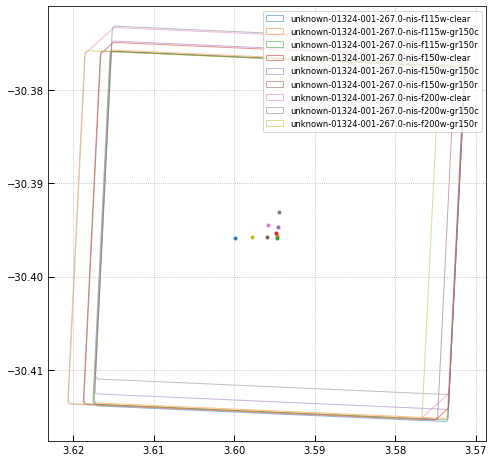

In [19]:
# Preview what will be processed
colors = [c['color'] for c in plt.rcParams['axes.prop_cycle']]

fig, ax = plt.subplots(1,1,figsize=(8,8))

for i, v in enumerate(visits):
    sr = utils.SRegion(v['footprint'])

    ax.scatter(*sr.centroid[0], marker='.', c=colors[i])
    
    for patch in sr.patch(ec=colors[i], fc='None', alpha=0.5, label=v['product']):
        ax.add_patch(patch)

ax.set_aspect(1./np.cos(ax.get_ylim()[0]/180*np.pi)) # square with cos(dec)
ax.set_xlim(ax.get_xlim()[::-1])
ax.legend()
ax.grid()

# Run the preprocessing scripts

The processing does the following:

1. CR rejection
2. Simple shifts alignment between exposures
3. Global astrometry w.r.t some reference
 - Here the scripts find reference sources in the LegacySurveys DR9 catalog
 - The first visit is aligned to the external reference
 - Then for subsequent "visits", 
   the (globally aligned) first *NIRISS* image itself will be used as the astrometric reference
4. Final background subtraction with a SourceExtractor-like median background

Reference astrometry:

- `preprocess_args['master_radec'] = '[some_radec_file]'`: All visits will be aligned to this 
- `preprocess_args['parent_radec'] = '[some_radec_file]'`: First visit will be aligned to this, subsequent visits that overlap will be aligned to each other.
- `preprocess_args['master_radec'] = None`: Query all-sky catalogs (LS DR9, PS1, GAIA, etc) for first visit.  Subsequent visits that overlap will be aligned to each other.


**NB** Can also drop in the catalog from M. Nonino as the astrometric reference.  The preprocess below just does an 
automatic query to the LegacySurveys DR9, which looks to be pretty well aligned with the Subaru ip image and is what was used to align the HST data.

In [20]:
if False:
    # A file with (at least) columns of "ra", "dec"
    preprocess_args['master_radec'] = os.path.join(HOME_PATH, '[SOME_REFERENCE].radec')

## Use reference astrometry

In [23]:
inp = utils.read_catalog('../abell2744_ip_2008_20220620_g3sw.cat', sextractor=True)
inp['ra'] = inp['ALPHAWIN_J2000']
inp['dec'] = inp['DELTAWIN_J2000']
radec_file = os.path.join(HOME_PATH, 'abell2744_ip_2008_20220620_g3sw.radec')
prep.table_to_radec(inp, radec_file)

preprocess_args['parent_radec'] = radec_file

In [24]:
im = pyfits.open(glob.glob('../RAW/*_rate.fits*')[0])

# Use the CONTEXT that was used when making the calibrated images above
# THis isn't used for much here, but sets the geometric distortion / WCS
print('CRDS_CONTEXT: ', im[0].header['CRDS_CTX'])

os.environ['CRDS_CONTEXT'] = im[0].header['CRDS_CTX']

CRDS_CONTEXT:  jwst_0862.pmap


In [26]:
os.chdir(os.path.join(HOME_PATH, 'Prep'))

# This script will do all the preprocessing of the grism *and* imaging visits 
# found in your archive query.
auto_script.preprocess(field_root=root, HOME_PATH=HOME_PATH,
                       visit_prep_args=visit_prep_args, **preprocess_args)

# (2022-06-26 10:25:56.037)

auto_script.preprocess(**{'field_root': 'nis-wfss', 'HOME_PATH': '/Users/gbrammer/Research/grizli/Test/Jwst/NIRISS-WFSS/GRB-Sims', 'PERSIST_PATH': None, 'min_overlap': 0.2, 'make_combined': False, 'catalogs': ['PS1', 'DES', 'NSC', 'SDSS', 'GAIA', 'WISE'], 'use_visit': True, 'master_radec': '/Users/gbrammer/Research/grizli/Test/Jwst/NIRISS-WFSS/GRB-Sims/abell2744_ip_2008_20220620_g3sw.radec', 'parent_radec': None, 'use_first_radec': False, 'skip_imaging': False, 'clean': True, 'skip_single_optical_visits': False, 'visit_prep_args': {'align_thresh': None, 'align_rms_limit': 2, 'align_mag_limits': [14, 24, 0.05], 'align_assume_close': False, 'align_transform': None, 'align_ref_border': 100, 'max_err_percentile': 99, 'align_min_flux_radius': 1.0, 'catalog_mask_pad': 0.05, 'match_catalog_density': False, 'drizzle_params': {}, 'single_image_CRs': True, 'run_tweak_align': True, 'tweak_threshold': 1.5, 'tweak_fit_order': -1, 'tweak_max_dist': 100, 'tweak_n_min': 10

In [27]:
# Update the visits file with the new exposure footprints
visit_file = auto_script.find_visit_file(root=root)
print('Update exposure footprints in {0}'.format(visit_file))
_ = auto_script.get_visit_exposure_footprints(root=root, check_paths=['./'])

Update exposure footprints in ./nis-wfss_visits.yaml


In [28]:
# Tweakshifts
! cat *shifts.log

# flt xshift yshift rot scale N rmsx rmsy
# fit_order: -1
# match['jw01324001001_01101_00001_nis_rate.fits'] = ['jw01324001001_01101_00002_nis_rate.fits']
# match['jw01324001001_01101_00006_nis_rate.fits'] = []
# match['jw01324001001_01101_00009_nis_rate.fits'] = ['jw01324001001_01101_00003_nis_rate.fits']
# match['jw01324001001_01101_00014_nis_rate.fits'] = []
jw01324001001_01101_00001_nis_rate.fits   0.000   0.000  0.00000  1.00000   100  0.000  0.000
jw01324001001_01101_00006_nis_rate.fits  -0.024  -0.007  0.00000  1.00000    98  0.040  0.046
jw01324001001_01101_00009_nis_rate.fits  -0.022  -0.022  0.00000  1.00000    98  0.031  0.036
jw01324001001_01101_00014_nis_rate.fits  -0.000   0.012  0.00000  1.00000    95  0.037  0.044
# flt xshift yshift rot scale N rmsx rmsy
# fit_order: -1
# match['jw01324001001_01101_00017_nis_rate.fits'] = ['jw01324001001_01101_00018_nis_rate.fits']
# match['jw01324001001_01101_00022_nis_rate.fits'] = []
# match['jw01324001001_01101_00025_nis_rate.fits'

In [29]:
# Global alignment.
# These derived shifts are non-zero because we shifted the reference catalog above
! cat *wcs.log

# ext xshift yshift rot scale rms N
# radec: /Users/gbrammer/Research/grizli/Test/Jwst/NIRISS-WFSS/GRB-Sims/abell2744_ip_2008_20220620_g3sw.radec
# unknown-01324-001-267.0-nis-f115w-clear
    0        1.3708       -0.6110        0.0185       1.00000         0.590   85
# ext xshift yshift rot scale rms N
# radec: /Users/gbrammer/Research/grizli/Test/Jwst/NIRISS-WFSS/GRB-Sims/abell2744_ip_2008_20220620_g3sw.radec
# unknown-01324-001-267.0-nis-f150w-clear
    0        1.2986       -0.5670        0.0147       1.00000         0.506   91
# ext xshift yshift rot scale rms N
# radec: /Users/gbrammer/Research/grizli/Test/Jwst/NIRISS-WFSS/GRB-Sims/abell2744_ip_2008_20220620_g3sw.radec
# unknown-01324-001-267.0-nis-f200w-clear
    0        3.3558       -1.5587        0.0157       1.00000         0.469   92


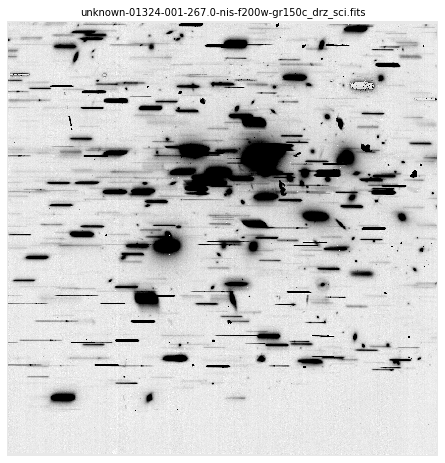

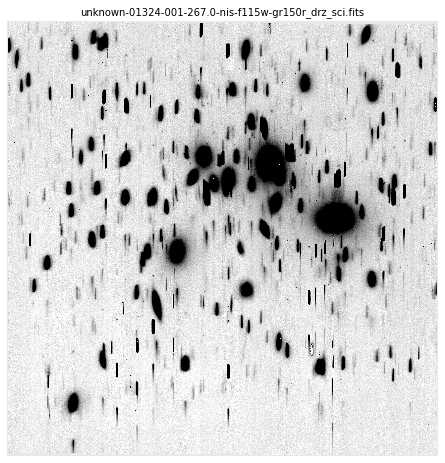

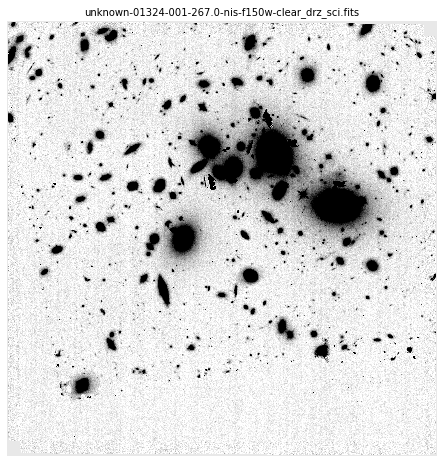

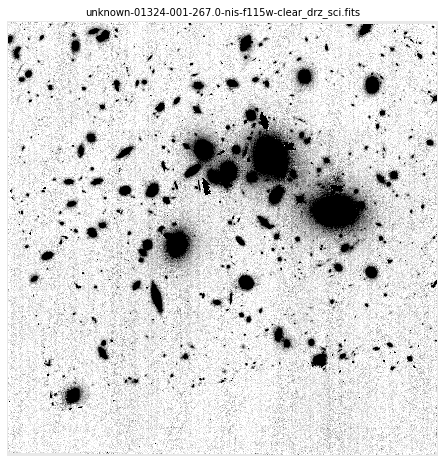

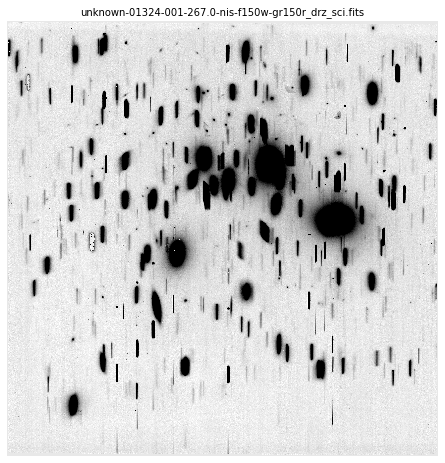

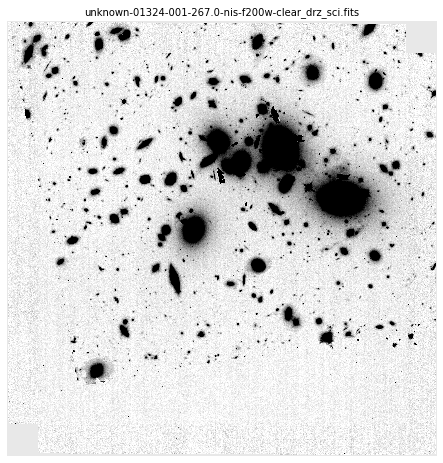

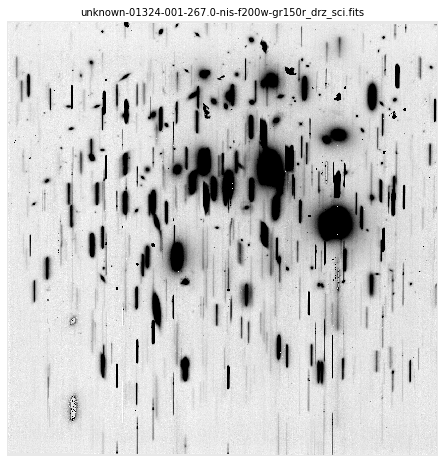

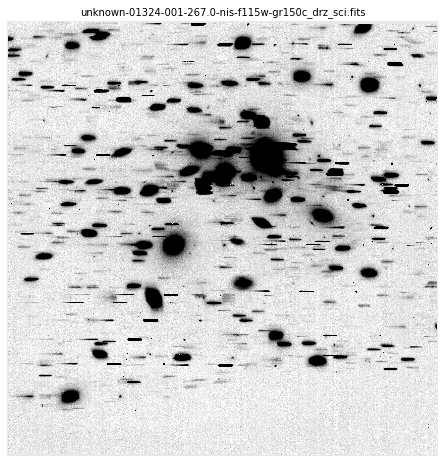

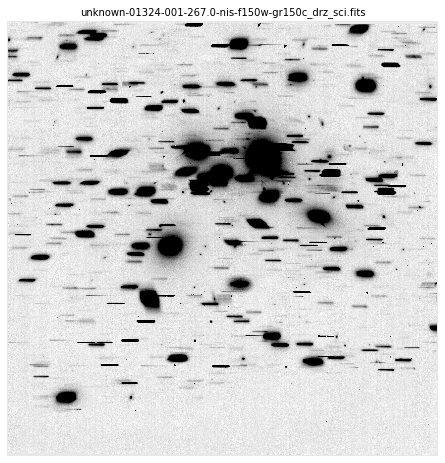

In [30]:
import matplotlib.pyplot as plt

files = glob.glob('*sci.fits')
for file in files:
    im = pyfits.open(file)
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    vm = np.nanpercentile(im[0].data, [5, 95])
    ax.imshow(im[0].data, vmin=-0.1*vm[1], vmax=vm[1], cmap='gray_r')
    ax.set_aspect(1)
    ax.set_title(file)
    ax.axis('off')

# Drizzle full mosaics

Combine all exposures in a given instrument/filter into mosaics with a common pixel grid.  

I favor the following pixel scales:

1. NIRCam/SW - 0.02" (0.031" native)
2. NIRISS, NIRCam/LW - 0.04" (0.065" native)
3. MIRI Imaging - 0.08" (0.11" native)

These grids differ by factors of two, so it is therefore possible to first define a pixel grid in the coarse 0.08" pixels and then finer grids that *exactly* subsample this 2x2.  With these 2x2 subgrids, you could, e.g., convolve a high resolution image with a PSF-matching kernel and then *block-average* 2x2 to get to the low-resolution grid.

In [31]:
os.chdir(os.path.join(HOME_PATH, 'Prep'))

# Global astrometry can fail for arbitrary WCS in simulations
# so clear out "failed" files before making mosaics
! ls *failed
if len(glob.glob('*failed')) > 0:
    ! rm *failed

ls: *failed: No such file or directory


In [32]:
# files = glob.glob('*rate.fits')
# files.sort()
# for filename in files:
#     img = pyfits.open(filename)
#     if 'TIME' in img:
#         _ = img.pop('TIME')
    
#     print(filename)
    
#     time = pyfits.ImageHDU(data=img['SCI',1].data)
#     #np.ones_like(img['SCI',1].data)*img[0].header['EXPTIME'])
#     time.data = None
#     time.header['EXTNAME'] = 'TIME'
#     time.header['EXTVER'] = 1
#     time.header['PIXVALUE'] = img[0].header['EXPTIME']*1.
#     time.header['BUNIT'] = 'SECONDS'
#     time.header['NPIX1'] = img['SCI'].header['NAXIS1']*1
#     time.header['NPIX2'] = img['SCI'].header['NAXIS2']*1
#     time.header['INHERIT'] = True

#     img.append(time)
#     img.writeto(filename, overwrite=True)
#     img.close()


In [33]:
mosaic_args = kwargs['mosaic_args']

mosaic_args['fill_mosaics'] = False

# Set the mosaic pixel scale here
mosaic_args['wcs_params']['pixel_scale'] = 0.05

mosaic_args['half_optical_pixscale'] = True

# Not really ir/optical, but this comes from HST
# ir are drizzled at mosaic_args['wcs_params']['pixel_scale'], 
# optical at half that

mosaic_args['ir_filters'] = ['F115W','F150W','F200W','F277W','F356W','F444W']
#mosaic_args['optical_filters'] = ['F115W','F150W','F200W'] # NIRCam

mosaic_args['wcs_params']['pad_reference'] = 6 # small padding around edge, arcsec
kwargs['mosaic_drizzle_args']['static'] = False

if True: 
    auto_script.make_combined_mosaics(root, mosaic_args=mosaic_args, 
                                      mosaic_drizzle_args=kwargs['mosaic_drizzle_args'])

2022-06-26 12:27:20,987 - stpipe - WARNING - VerifyWarning: Verification reported errors:
2022-06-26 12:27:20,991 - stpipe - WARNING - VerifyWarning: HDU 1:
2022-06-26 12:27:20,993 - stpipe - WARNING - VerifyWarning:     'NAXIS1' card at the wrong place (card 13).  Fixed by moving it to the right place (card 3).
2022-06-26 12:27:20,997 - stpipe - WARNING - VerifyWarning:     'NAXIS2' card at the wrong place (card 14).  Fixed by moving it to the right place (card 4).
 [astropy.io.fits.verify]
2022-06-26 12:27:21,000 - stpipe - WARNING - VerifyWarning: Note: astropy.io.fits uses zero-based indexing.



  0/ 24: jw01324001001_01101_00001_nis_rate.fits[SCI,1]    5.14
  1/ 24: jw01324001001_01101_00002_nis_rate.fits[SCI,1]    5.14
  2/ 24: jw01324001001_01101_00003_nis_rate.fits[SCI,1]    5.17
  3/ 24: jw01324001001_01101_00006_nis_rate.fits[SCI,1]    5.18
  4/ 24: jw01324001001_01101_00009_nis_rate.fits[SCI,1]    5.18
  5/ 24: jw01324001001_01101_00010_nis_rate.fits[SCI,1]    5.18
  6/ 24: jw01324001001_01101_00011_nis_rate.fits[SCI,1]    5.21
  7/ 24: jw01324001001_01101_00014_nis_rate.fits[SCI,1]    5.21
  8/ 24: jw01324001001_01101_00017_nis_rate.fits[SCI,1]    5.33
  9/ 24: jw01324001001_01101_00018_nis_rate.fits[SCI,1]    5.33
 10/ 24: jw01324001001_01101_00019_nis_rate.fits[SCI,1]    5.35
 11/ 24: jw01324001001_01101_00022_nis_rate.fits[SCI,1]    5.35
 12/ 24: jw01324001001_01101_00025_nis_rate.fits[SCI,1]    5.47
 13/ 24: jw01324001001_01101_00026_nis_rate.fits[SCI,1]    5.47
 14/ 24: jw01324001001_01101_00027_nis_rate.fits[SCI,1]    5.49
 15/ 24: jw01324001001_01101_00030_nis_r

2022-06-26 12:27:23,210 - stpipe - INFO - Setting up logfile :  astrodrizzle.log


Setting up logfile :  astrodrizzle.log


2022-06-26 12:27:23,212 - stpipe - INFO - AstroDrizzle log file: astrodrizzle.log


AstroDrizzle log file: astrodrizzle.log


2022-06-26 12:27:23,214 - stpipe - INFO - AstroDrizzle Version 3.4.1 started at: 12:27:23.214 (26/06/2022)


AstroDrizzle Version 3.4.1 started at: 12:27:23.214 (26/06/2022)


2022-06-26 12:27:23,215 - stpipe - INFO - 


2022-06-26 12:27:23,216 - stpipe - INFO - Version Information
2022-06-26 12:27:23,217 - stpipe - INFO - --------------------
2022-06-26 12:27:23,218 - stpipe - INFO - Python Version [Clang 12.0.1 ]
2022-06-26 12:27:23,219 - stpipe - INFO - 3.9.12 | packaged by conda-forge | (main, Mar 24 2022, 23:23:20) 
2022-06-26 12:27:23,220 - stpipe - INFO - numpy Version -> 1.22.3 
2022-06-26 12:27:23,221 - stpipe - INFO - astropy Version -> 5.0.4 
2022-06-26 12:27:23,222 - stpipe - INFO - stwcs Version -> 1.7.2 
2022-06-26 12:27:23,223 - stpipe - INFO - ==== Processing Step  Initialization  started at  12:27:23.223 (26/06/2022)


==== Processing Step  Initialization  started at  12:27:23.223 (26/06/2022)


2022-06-26 12:27:23,224 - stpipe - INFO - 


2022-06-26 12:27:23,287 - stpipe - INFO - Executing serially
2022-06-26 12:27:23,370 - stpipe - INFO - Setting up output name: nis-wfss-f115w_drz.fits
2022-06-26 12:27:23,377 - stpipe - INFO - -Creating imageObject List as input for processing steps.
2022-06-26 12:27:23,492 - stpipe - INFO - Reading in MDRIZSKY of 1.123597025871277
2022-06-26 12:27:23,609 - stpipe - INFO - Reading in MDRIZSKY of 1.106376767158508
2022-06-26 12:27:23,726 - stpipe - INFO - Reading in MDRIZSKY of 1.12362802028656
2022-06-26 12:27:23,865 - stpipe - INFO - Reading in MDRIZSKY of 1.102311491966248
2022-06-26 12:27:23,890 - stpipe - INFO - No context image will be created for jw01324001001_01101_00001_nis_rate.fits
2022-06-26 12:27:23,891 - stpipe - INFO - No context image will be created for jw01324001001_01101_00006_nis_rate.fits
2022-06-26 12:27:23,892 - stpipe - INFO - No context image will be created for jw01324001001_01101_00009_nis_rate.fits
2022-06-26 12:27:23,893 - stpipe - INFO - No context image wi

Creating OUTPUT WCS from nis-wfss_wcs-ref.fits[1]


2022-06-26 12:27:23,913 - stpipe - INFO - WCS Keywords


WCS Keywords


2022-06-26 12:27:23,914 - stpipe - INFO - 


2022-06-26 12:27:23,916 - stpipe - INFO - CD_11  CD_12: -1.3888888888888e-05 0.0


CD_11  CD_12: -1.3888888888888e-05 0.0


2022-06-26 12:27:23,918 - stpipe - INFO - CD_21  CD_22: 0.0 1.38888888888888e-05


CD_21  CD_22: 0.0 1.38888888888888e-05


2022-06-26 12:27:23,920 - stpipe - INFO - CRVAL    : 3.595889489804483 -30.39423606954831


CRVAL    : 3.595889489804483 -30.39423606954831


2022-06-26 12:27:23,922 - stpipe - INFO - CRPIX    : 1656.0 1640.5


CRPIX    : 1656.0 1640.5


2022-06-26 12:27:23,923 - stpipe - INFO - NAXIS    : 3312 3281


NAXIS    : 3312 3281


2022-06-26 12:27:23,925 - stpipe - INFO - Plate Scale : 0.049999999999996804


Plate Scale : 0.049999999999996804


2022-06-26 12:27:23,926 - stpipe - INFO - ORIENTAT : 0.0


ORIENTAT : 0.0


2022-06-26 12:27:23,928 - stpipe - INFO - ********************************************************************************


********************************************************************************


2022-06-26 12:27:23,930 - stpipe - INFO - *


*


2022-06-26 12:27:23,932 - stpipe - INFO - *  Estimated memory usage:  up to 156 Mb.


*  Estimated memory usage:  up to 156 Mb.


2022-06-26 12:27:23,934 - stpipe - INFO - *  Output image size:       3312 X 3281 pixels. 


*  Output image size:       3312 X 3281 pixels. 


2022-06-26 12:27:23,936 - stpipe - INFO - *  Output image file:       ~ 124 Mb. 


*  Output image file:       ~ 124 Mb. 


2022-06-26 12:27:23,937 - stpipe - INFO - *  Cores available:         1


*  Cores available:         1


2022-06-26 12:27:23,939 - stpipe - INFO - *


*


2022-06-26 12:27:23,940 - stpipe - INFO - ********************************************************************************


********************************************************************************


2022-06-26 12:27:23,942 - stpipe - INFO - ==== Processing Step Initialization finished at 12:27:23.941 (26/06/2022)


==== Processing Step Initialization finished at 12:27:23.941 (26/06/2022)


2022-06-26 12:27:23,943 - stpipe - INFO - USER INPUT PARAMETERS common to all Processing Steps:
2022-06-26 12:27:23,944 - stpipe - INFO - 	build :	False
2022-06-26 12:27:23,945 - stpipe - INFO - 	coeffs :	True
2022-06-26 12:27:23,945 - stpipe - INFO - 	context :	False
2022-06-26 12:27:23,946 - stpipe - INFO - 	crbit :	4096
2022-06-26 12:27:23,947 - stpipe - INFO - 	group :	
2022-06-26 12:27:23,947 - stpipe - INFO - 	in_memory :	False
2022-06-26 12:27:23,948 - stpipe - INFO - 	input :	['jw01324001001_01101_00001_nis_rate.fits', 'jw01324001001_01101_00006_nis_rate.fits', 'jw01324001001_01101_00009_nis_rate.fits', 'jw01324001001_01101_00014_nis_rate.fits']
2022-06-26 12:27:23,949 - stpipe - INFO - 	mdriztab :	False
2022-06-26 12:27:23,949 - stpipe - INFO - 	num_cores :	None
2022-06-26 12:27:23,950 - stpipe - INFO - 	output :	nis-wfss-f115w
2022-06-26 12:27:23,950 - stpipe - INFO - 	proc_unit :	native
2022-06-26 12:27:23,951 - stpipe - INFO - 	resetbits :	0
2022-06-26 12:27:23,952 - stpipe

==== Processing Step  Static Mask  started at  12:27:23.955 (26/06/2022)


2022-06-26 12:27:23,956 - stpipe - INFO - 


2022-06-26 12:27:23,957 - stpipe - INFO - Static Mask step not performed.
2022-06-26 12:27:23,958 - stpipe - INFO - ==== Processing Step Static Mask finished at 12:27:23.95 (26/06/2022)


==== Processing Step Static Mask finished at 12:27:23.95 (26/06/2022)


2022-06-26 12:27:23,959 - stpipe - INFO - ==== Processing Step  Subtract Sky  started at  12:27:23.959 (26/06/2022)


==== Processing Step  Subtract Sky  started at  12:27:23.959 (26/06/2022)


2022-06-26 12:27:23,961 - stpipe - INFO - 


2022-06-26 12:27:23,962 - stpipe - INFO - Sky Subtraction step not performed.
2022-06-26 12:27:24,183 - stpipe - INFO - Retrieving user computed sky values from image headers 
2022-06-26 12:27:24,183 - stpipe - INFO - recorded in the 'MDRIZSKY' header keywords.
2022-06-26 12:27:24,184 - stpipe - INFO - Working on sky for: jw01324001001_01101_00001_nis_rate.fits
2022-06-26 12:27:24,185 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2022-06-26 12:27:24,186 - stpipe - INFO - Working on sky for: jw01324001001_01101_00006_nis_rate.fits
2022-06-26 12:27:24,187 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2022-06-26 12:27:24,188 - stpipe - INFO - Working on sky for: jw01324001001_01101_00009_nis_rate.fits
2022-06-26 12:27:24,189 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2022-06-26 12:27:24,190 - stpipe - INFO - Working on sky for: jw01324001001_01101_00014_nis_rate.fits
2022-06-26 12:27:24,191 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2022-06-26 12:27:24,192 - stpipe - INFO - ==== Processing Step Subtract Sky finished at 12:27:24.19 (26/06/2022)


==== Processing Step Subtract Sky finished at 12:27:24.19 (26/06/2022)


2022-06-26 12:27:24,194 - stpipe - INFO - ==== Processing Step  Separate Drizzle  started at  12:27:24.194 (26/06/2022)


==== Processing Step  Separate Drizzle  started at  12:27:24.194 (26/06/2022)


2022-06-26 12:27:24,196 - stpipe - INFO - 


2022-06-26 12:27:24,197 - stpipe - INFO - Single drizzle step not performed.
2022-06-26 12:27:24,198 - stpipe - INFO - ==== Processing Step Separate Drizzle finished at 12:27:24.198 (26/06/2022)


==== Processing Step Separate Drizzle finished at 12:27:24.198 (26/06/2022)


2022-06-26 12:27:24,200 - stpipe - INFO - ==== Processing Step  Create Median  started at  12:27:24.200 (26/06/2022)


==== Processing Step  Create Median  started at  12:27:24.200 (26/06/2022)


2022-06-26 12:27:24,201 - stpipe - INFO - 


2022-06-26 12:27:24,203 - stpipe - INFO - Median combination step not performed.
2022-06-26 12:27:24,204 - stpipe - INFO - ==== Processing Step  Blot  started at  12:27:24.204 (26/06/2022)


==== Processing Step  Blot  started at  12:27:24.204 (26/06/2022)


2022-06-26 12:27:24,205 - stpipe - INFO - 


2022-06-26 12:27:24,207 - stpipe - INFO - Blot step not performed.
2022-06-26 12:27:24,208 - stpipe - INFO - ==== Processing Step Blot finished at 12:27:24.208 (26/06/2022)


==== Processing Step Blot finished at 12:27:24.208 (26/06/2022)


2022-06-26 12:27:24,209 - stpipe - INFO - ==== Processing Step  Driz_CR  started at  12:27:24.20 (26/06/2022)


==== Processing Step  Driz_CR  started at  12:27:24.20 (26/06/2022)


2022-06-26 12:27:24,211 - stpipe - INFO - 


2022-06-26 12:27:24,212 - stpipe - INFO - Cosmic-ray identification (driz_cr) step not performed.
2022-06-26 12:27:24,213 - stpipe - INFO - ==== Processing Step  Final Drizzle  started at  12:27:24.213 (26/06/2022)


==== Processing Step  Final Drizzle  started at  12:27:24.213 (26/06/2022)


2022-06-26 12:27:24,214 - stpipe - INFO - 


2022-06-26 12:27:24,216 - stpipe - INFO - Interpreted paramDict with single=False as:
2022-06-26 12:27:24,217 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'wht_type': 'IVM', 'kernel': 'square', 'wt_scl': 'exptime', 'pixfrac': 0.75, 'fillval': None, 'maskval': None, 'bits': 1, 'units': 'cps'}
2022-06-26 12:27:24,217 - stpipe - INFO - USER INPUT PARAMETERS for Final Drizzle Step:
2022-06-26 12:27:24,218 - stpipe - INFO - 	bits :	1
2022-06-26 12:27:24,219 - stpipe - INFO - 	build :	False
2022-06-26 12:27:24,219 - stpipe - INFO - 	clean :	True
2022-06-26 12:27:24,220 - stpipe - INFO - 	coeffs :	True
2022-06-26 12:27:24,221 - stpipe - INFO - 	crbit :	4096
2022-06-26 12:27:24,222 - stpipe - INFO - 	fillval :	None
2022-06-26 12:27:24,223 - stpipe - INFO - 	kernel :	square
2022-06-26 12:27:24,223 - stpipe - INFO - 	logfile :	astrodrizzle.log
2022-06-26 12:27:24,224 - stpipe - INFO - 	maskval :	None
2022-06-26 12:27:24,225 - stpipe - INFO - 	pixfrac :	0.75
20

WCS Keywords


2022-06-26 12:27:24,235 - stpipe - INFO - 


2022-06-26 12:27:24,236 - stpipe - INFO - CD_11  CD_12: -1.3888888888888e-05 0.0


CD_11  CD_12: -1.3888888888888e-05 0.0


2022-06-26 12:27:24,238 - stpipe - INFO - CD_21  CD_22: 0.0 1.38888888888888e-05


CD_21  CD_22: 0.0 1.38888888888888e-05


2022-06-26 12:27:24,239 - stpipe - INFO - CRVAL    : 3.595889489804483 -30.39423606954831


CRVAL    : 3.595889489804483 -30.39423606954831


2022-06-26 12:27:24,241 - stpipe - INFO - CRPIX    : 1656.0 1640.5


CRPIX    : 1656.0 1640.5


2022-06-26 12:27:24,243 - stpipe - INFO - NAXIS    : 3312 3281


NAXIS    : 3312 3281


2022-06-26 12:27:24,244 - stpipe - INFO - Plate Scale : 0.049999999999996804


Plate Scale : 0.049999999999996804


2022-06-26 12:27:24,245 - stpipe - INFO - ORIENTAT : 0.0


ORIENTAT : 0.0


2022-06-26 12:27:24,310 - stpipe - INFO - -Drizzle input: jw01324001001_01101_00001_nis_rate.fits[sci,1]
2022-06-26 12:27:24,333 - stpipe - INFO - Applying sky value of 1.123597 to jw01324001001_01101_00001_nis_rate.fits[sci,1]
2022-06-26 12:27:24,374 - stpipe - WARNING - No CR mask file found! Input DQ array not updated.
2022-06-26 12:27:24,374 - stpipe - INFO - Automatically creating IVM files for chip 1
2022-06-26 12:27:24,383 - stpipe - WARNING - Cannot find flat field file 'jwst_niriss_flat_0252.fits'
2022-06-26 12:27:24,384 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2022-06-26 12:27:24,509 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2022-06-26 12:27:24,510 - stpipe - INFO - stepsize = 10
2022-06-26 12:27:24,534 - stpipe - INFO - -Drizzling using kernel = square
2022-06-26 12:27:24,535 - stpipe - INFO - 
2022-06-26 12:27:25,965 - stpipe - INFO - -Drizzle input: jw01324001001_01101_00006_nis_rate.fits[sci,1]
2022-06-26 12:27:25,987 - s

-Generating simple FITS output: nis-wfss-f115w_drz_sci.fits


2022-06-26 12:27:30,081 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/py39-may10/lib/python3.9/site-packages/astropy/io/fits/card.py:1009: VerifyWarning: Card is too long, comment will be truncated.
  warnings.warn('Card is too long, comment will be truncated.',

2022-06-26 12:27:30,165 - stpipe - INFO - Writing out image to disk: nis-wfss-f115w_drz_sci.fits


Writing out image to disk: nis-wfss-f115w_drz_sci.fits


2022-06-26 12:27:30,452 - stpipe - INFO - Writing out image to disk: nis-wfss-f115w_drz_wht.fits


Writing out image to disk: nis-wfss-f115w_drz_wht.fits


2022-06-26 12:27:30,690 - stpipe - INFO - ==== Processing Step Final Drizzle finished at 12:27:30.690 (26/06/2022)


==== Processing Step Final Drizzle finished at 12:27:30.690 (26/06/2022)


2022-06-26 12:27:30,692 - stpipe - INFO - 


2022-06-26 12:27:30,693 - stpipe - INFO - AstroDrizzle Version 3.4.1 is finished processing at 12:27:30.693 (26/06/2022).


AstroDrizzle Version 3.4.1 is finished processing at 12:27:30.693 (26/06/2022).


2022-06-26 12:27:30,694 - stpipe - INFO - 


2022-06-26 12:27:30,695 - stpipe - INFO - 


2022-06-26 12:27:30,697 - stpipe - INFO - 


2022-06-26 12:27:30,698 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2022-06-26 12:27:30,699 - stpipe - INFO -                    Step          Elapsed time


                   Step          Elapsed time


2022-06-26 12:27:30,701 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2022-06-26 12:27:30,702 - stpipe - INFO - 


2022-06-26 12:27:30,703 - stpipe - INFO -          Initialization          0.7187 sec.


         Initialization          0.7187 sec.


2022-06-26 12:27:30,705 - stpipe - INFO -             Static Mask          0.0033 sec.


            Static Mask          0.0033 sec.


2022-06-26 12:27:30,706 - stpipe - INFO -            Subtract Sky          0.2327 sec.


           Subtract Sky          0.2327 sec.


2022-06-26 12:27:30,707 - stpipe - INFO -        Separate Drizzle          0.0041 sec.


       Separate Drizzle          0.0041 sec.


2022-06-26 12:27:30,708 - stpipe - INFO -           Create Median          0.0000 sec.


          Create Median          0.0000 sec.


2022-06-26 12:27:30,710 - stpipe - INFO -                    Blot          0.0040 sec.


                   Blot          0.0040 sec.


2022-06-26 12:27:30,711 - stpipe - INFO -                 Driz_CR          0.0000 sec.


                Driz_CR          0.0000 sec.


2022-06-26 12:27:30,712 - stpipe - INFO -           Final Drizzle          6.4771 sec.


          Final Drizzle          6.4771 sec.


2022-06-26 12:27:30,713 - stpipe - INFO -    ====================          ====================


   ====================          ====================


2022-06-26 12:27:30,714 - stpipe - INFO -                   Total          7.4398 sec.


                  Total          7.4398 sec.


2022-06-26 12:27:30,716 - stpipe - INFO - 


2022-06-26 12:27:30,717 - stpipe - INFO - Removing intermediate files for jw01324001001_01101_00001_nis_rate.fits
2022-06-26 12:27:30,724 - stpipe - INFO - Removing intermediate files for jw01324001001_01101_00006_nis_rate.fits
2022-06-26 12:27:30,730 - stpipe - INFO - Removing intermediate files for jw01324001001_01101_00009_nis_rate.fits
2022-06-26 12:27:30,737 - stpipe - INFO - Removing intermediate files for jw01324001001_01101_00014_nis_rate.fits
2022-06-26 12:27:30,745 - stpipe - INFO - Trailer file written to:  astrodrizzle.log


Trailer file written to:  astrodrizzle.log
# (2022-06-26 10:27:30.998)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw01324001001_01101_00001_nis_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE']})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRISS (OINSTRUM)
Reset: DETECTOR > NIS (ODETECTO)
Reset: FILTER > CLEAR (OFILTER)
Reset: PUPIL > F115W (OPUPIL)
Reset: EXP_TYPE > NIS_IMAGE (OEXP_TYP)
# (2022-06-26 10:27:31.949)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw01324001001_01101_00006_nis_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE']})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRISS (OINSTRUM)
Reset: DETECTOR > NIS (ODETECTO)
Reset: FILTER > CLEAR (OFILTER)
Reset: PUPIL > F115W (OPUPIL)
Reset: EXP_TYPE > NIS_IMAGE (OEXP_TYP)
# (2022-06-26 10:27:32.904)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 

2022-06-26 12:27:36,437 - stpipe - INFO - Setting up logfile :  astrodrizzle.log


Setting up logfile :  astrodrizzle.log


2022-06-26 12:27:36,439 - stpipe - INFO - AstroDrizzle log file: astrodrizzle.log


AstroDrizzle log file: astrodrizzle.log


2022-06-26 12:27:36,440 - stpipe - INFO - AstroDrizzle Version 3.4.1 started at: 12:27:36.440 (26/06/2022)


AstroDrizzle Version 3.4.1 started at: 12:27:36.440 (26/06/2022)


2022-06-26 12:27:36,441 - stpipe - INFO - 


2022-06-26 12:27:36,442 - stpipe - INFO - Version Information
2022-06-26 12:27:36,443 - stpipe - INFO - --------------------
2022-06-26 12:27:36,444 - stpipe - INFO - Python Version [Clang 12.0.1 ]
2022-06-26 12:27:36,444 - stpipe - INFO - 3.9.12 | packaged by conda-forge | (main, Mar 24 2022, 23:23:20) 
2022-06-26 12:27:36,445 - stpipe - INFO - numpy Version -> 1.22.3 
2022-06-26 12:27:36,445 - stpipe - INFO - astropy Version -> 5.0.4 
2022-06-26 12:27:36,446 - stpipe - INFO - stwcs Version -> 1.7.2 
2022-06-26 12:27:36,447 - stpipe - INFO - ==== Processing Step  Initialization  started at  12:27:36.4 (26/06/2022)


==== Processing Step  Initialization  started at  12:27:36.4 (26/06/2022)


2022-06-26 12:27:36,448 - stpipe - INFO - 


2022-06-26 12:27:36,496 - stpipe - INFO - Executing serially
2022-06-26 12:27:36,556 - stpipe - INFO - Setting up output name: nis-wfss-f150w_drz.fits
2022-06-26 12:27:36,561 - stpipe - INFO - -Creating imageObject List as input for processing steps.
2022-06-26 12:27:36,635 - stpipe - INFO - Reading in MDRIZSKY of 0.808908998966217
2022-06-26 12:27:36,725 - stpipe - INFO - Reading in MDRIZSKY of 0.8102341890335083
2022-06-26 12:27:36,810 - stpipe - INFO - Reading in MDRIZSKY of 0.8070216178894042
2022-06-26 12:27:36,899 - stpipe - INFO - Reading in MDRIZSKY of 0.8049106597900392
2022-06-26 12:27:36,918 - stpipe - INFO - No context image will be created for jw01324001001_01101_00017_nis_rate.fits
2022-06-26 12:27:36,919 - stpipe - INFO - No context image will be created for jw01324001001_01101_00022_nis_rate.fits
2022-06-26 12:27:36,920 - stpipe - INFO - No context image will be created for jw01324001001_01101_00025_nis_rate.fits
2022-06-26 12:27:36,920 - stpipe - INFO - No context imag

Creating OUTPUT WCS from nis-wfss_wcs-ref.fits[1]


2022-06-26 12:27:36,935 - stpipe - INFO - WCS Keywords


WCS Keywords


2022-06-26 12:27:36,937 - stpipe - INFO - 


2022-06-26 12:27:36,938 - stpipe - INFO - CD_11  CD_12: -1.3888888888888e-05 0.0


CD_11  CD_12: -1.3888888888888e-05 0.0


2022-06-26 12:27:36,940 - stpipe - INFO - CD_21  CD_22: 0.0 1.38888888888888e-05


CD_21  CD_22: 0.0 1.38888888888888e-05


2022-06-26 12:27:36,942 - stpipe - INFO - CRVAL    : 3.595889489804483 -30.39423606954831


CRVAL    : 3.595889489804483 -30.39423606954831


2022-06-26 12:27:36,944 - stpipe - INFO - CRPIX    : 1656.0 1640.5


CRPIX    : 1656.0 1640.5


2022-06-26 12:27:36,945 - stpipe - INFO - NAXIS    : 3312 3281


NAXIS    : 3312 3281


2022-06-26 12:27:36,946 - stpipe - INFO - Plate Scale : 0.049999999999996804


Plate Scale : 0.049999999999996804


2022-06-26 12:27:36,947 - stpipe - INFO - ORIENTAT : 0.0


ORIENTAT : 0.0


2022-06-26 12:27:36,949 - stpipe - INFO - ********************************************************************************


********************************************************************************


2022-06-26 12:27:36,950 - stpipe - INFO - *


*


2022-06-26 12:27:36,951 - stpipe - INFO - *  Estimated memory usage:  up to 156 Mb.


*  Estimated memory usage:  up to 156 Mb.


2022-06-26 12:27:36,952 - stpipe - INFO - *  Output image size:       3312 X 3281 pixels. 


*  Output image size:       3312 X 3281 pixels. 


2022-06-26 12:27:36,953 - stpipe - INFO - *  Output image file:       ~ 124 Mb. 


*  Output image file:       ~ 124 Mb. 


2022-06-26 12:27:36,954 - stpipe - INFO - *  Cores available:         1


*  Cores available:         1


2022-06-26 12:27:36,955 - stpipe - INFO - *


*


2022-06-26 12:27:36,956 - stpipe - INFO - ********************************************************************************


********************************************************************************


2022-06-26 12:27:36,958 - stpipe - INFO - ==== Processing Step Initialization finished at 12:27:36.957 (26/06/2022)


==== Processing Step Initialization finished at 12:27:36.957 (26/06/2022)


2022-06-26 12:27:36,959 - stpipe - INFO - USER INPUT PARAMETERS common to all Processing Steps:
2022-06-26 12:27:36,960 - stpipe - INFO - 	build :	False
2022-06-26 12:27:36,960 - stpipe - INFO - 	coeffs :	True
2022-06-26 12:27:36,961 - stpipe - INFO - 	context :	False
2022-06-26 12:27:36,961 - stpipe - INFO - 	crbit :	4096
2022-06-26 12:27:36,962 - stpipe - INFO - 	group :	
2022-06-26 12:27:36,963 - stpipe - INFO - 	in_memory :	False
2022-06-26 12:27:36,963 - stpipe - INFO - 	input :	['jw01324001001_01101_00017_nis_rate.fits', 'jw01324001001_01101_00022_nis_rate.fits', 'jw01324001001_01101_00025_nis_rate.fits', 'jw01324001001_01101_00030_nis_rate.fits']
2022-06-26 12:27:36,964 - stpipe - INFO - 	mdriztab :	False
2022-06-26 12:27:36,964 - stpipe - INFO - 	num_cores :	None
2022-06-26 12:27:36,965 - stpipe - INFO - 	output :	nis-wfss-f150w
2022-06-26 12:27:36,965 - stpipe - INFO - 	proc_unit :	native
2022-06-26 12:27:36,966 - stpipe - INFO - 	resetbits :	0
2022-06-26 12:27:36,966 - stpipe

==== Processing Step  Static Mask  started at  12:27:36.969 (26/06/2022)


2022-06-26 12:27:36,970 - stpipe - INFO - 


2022-06-26 12:27:36,971 - stpipe - INFO - Static Mask step not performed.
2022-06-26 12:27:36,972 - stpipe - INFO - ==== Processing Step Static Mask finished at 12:27:36.972 (26/06/2022)


==== Processing Step Static Mask finished at 12:27:36.972 (26/06/2022)


2022-06-26 12:27:36,974 - stpipe - INFO - ==== Processing Step  Subtract Sky  started at  12:27:36.973 (26/06/2022)


==== Processing Step  Subtract Sky  started at  12:27:36.973 (26/06/2022)


2022-06-26 12:27:36,975 - stpipe - INFO - 


2022-06-26 12:27:36,976 - stpipe - INFO - Sky Subtraction step not performed.
2022-06-26 12:27:37,162 - stpipe - INFO - Retrieving user computed sky values from image headers 
2022-06-26 12:27:37,163 - stpipe - INFO - recorded in the 'MDRIZSKY' header keywords.
2022-06-26 12:27:37,163 - stpipe - INFO - Working on sky for: jw01324001001_01101_00017_nis_rate.fits
2022-06-26 12:27:37,164 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2022-06-26 12:27:37,165 - stpipe - INFO - Working on sky for: jw01324001001_01101_00022_nis_rate.fits
2022-06-26 12:27:37,166 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2022-06-26 12:27:37,167 - stpipe - INFO - Working on sky for: jw01324001001_01101_00025_nis_rate.fits
2022-06-26 12:27:37,168 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2022-06-26 12:27:37,169 - stpipe - INFO - Working on sky for: jw01324001001_01101_00030_nis_rate.fits
2022-06-26 12:27:37,170 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2022-06-26 12:27:37,171 - stpipe - INFO - ==== Processing Step Subtract Sky finished at 12:27:37.171 (26/06/2022)


==== Processing Step Subtract Sky finished at 12:27:37.171 (26/06/2022)


2022-06-26 12:27:37,173 - stpipe - INFO - ==== Processing Step  Separate Drizzle  started at  12:27:37.173 (26/06/2022)


==== Processing Step  Separate Drizzle  started at  12:27:37.173 (26/06/2022)


2022-06-26 12:27:37,174 - stpipe - INFO - 


2022-06-26 12:27:37,175 - stpipe - INFO - Single drizzle step not performed.
2022-06-26 12:27:37,176 - stpipe - INFO - ==== Processing Step Separate Drizzle finished at 12:27:37.176 (26/06/2022)


==== Processing Step Separate Drizzle finished at 12:27:37.176 (26/06/2022)


2022-06-26 12:27:37,178 - stpipe - INFO - ==== Processing Step  Create Median  started at  12:27:37.177 (26/06/2022)


==== Processing Step  Create Median  started at  12:27:37.177 (26/06/2022)


2022-06-26 12:27:37,178 - stpipe - INFO - 


2022-06-26 12:27:37,180 - stpipe - INFO - Median combination step not performed.
2022-06-26 12:27:37,180 - stpipe - INFO - ==== Processing Step  Blot  started at  12:27:37.180 (26/06/2022)


==== Processing Step  Blot  started at  12:27:37.180 (26/06/2022)


2022-06-26 12:27:37,181 - stpipe - INFO - 


2022-06-26 12:27:37,183 - stpipe - INFO - Blot step not performed.
2022-06-26 12:27:37,183 - stpipe - INFO - ==== Processing Step Blot finished at 12:27:37.18 (26/06/2022)


==== Processing Step Blot finished at 12:27:37.18 (26/06/2022)


2022-06-26 12:27:37,185 - stpipe - INFO - ==== Processing Step  Driz_CR  started at  12:27:37.185 (26/06/2022)


==== Processing Step  Driz_CR  started at  12:27:37.185 (26/06/2022)


2022-06-26 12:27:37,186 - stpipe - INFO - 


2022-06-26 12:27:37,187 - stpipe - INFO - Cosmic-ray identification (driz_cr) step not performed.
2022-06-26 12:27:37,187 - stpipe - INFO - ==== Processing Step  Final Drizzle  started at  12:27:37.187 (26/06/2022)


==== Processing Step  Final Drizzle  started at  12:27:37.187 (26/06/2022)


2022-06-26 12:27:37,188 - stpipe - INFO - 


2022-06-26 12:27:37,190 - stpipe - INFO - Interpreted paramDict with single=False as:
2022-06-26 12:27:37,190 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'wht_type': 'IVM', 'kernel': 'square', 'wt_scl': 'exptime', 'pixfrac': 0.75, 'fillval': None, 'maskval': None, 'bits': 1, 'units': 'cps'}
2022-06-26 12:27:37,191 - stpipe - INFO - USER INPUT PARAMETERS for Final Drizzle Step:
2022-06-26 12:27:37,192 - stpipe - INFO - 	bits :	1
2022-06-26 12:27:37,192 - stpipe - INFO - 	build :	False
2022-06-26 12:27:37,193 - stpipe - INFO - 	clean :	True
2022-06-26 12:27:37,194 - stpipe - INFO - 	coeffs :	True
2022-06-26 12:27:37,194 - stpipe - INFO - 	crbit :	4096
2022-06-26 12:27:37,195 - stpipe - INFO - 	fillval :	None
2022-06-26 12:27:37,195 - stpipe - INFO - 	kernel :	square
2022-06-26 12:27:37,196 - stpipe - INFO - 	logfile :	astrodrizzle.log
2022-06-26 12:27:37,196 - stpipe - INFO - 	maskval :	None
2022-06-26 12:27:37,197 - stpipe - INFO - 	pixfrac :	0.75
20

WCS Keywords


2022-06-26 12:27:37,203 - stpipe - INFO - 


2022-06-26 12:27:37,204 - stpipe - INFO - CD_11  CD_12: -1.3888888888888e-05 0.0


CD_11  CD_12: -1.3888888888888e-05 0.0


2022-06-26 12:27:37,205 - stpipe - INFO - CD_21  CD_22: 0.0 1.38888888888888e-05


CD_21  CD_22: 0.0 1.38888888888888e-05


2022-06-26 12:27:37,206 - stpipe - INFO - CRVAL    : 3.595889489804483 -30.39423606954831


CRVAL    : 3.595889489804483 -30.39423606954831


2022-06-26 12:27:37,208 - stpipe - INFO - CRPIX    : 1656.0 1640.5


CRPIX    : 1656.0 1640.5


2022-06-26 12:27:37,208 - stpipe - INFO - NAXIS    : 3312 3281


NAXIS    : 3312 3281


2022-06-26 12:27:37,210 - stpipe - INFO - Plate Scale : 0.049999999999996804


Plate Scale : 0.049999999999996804


2022-06-26 12:27:37,211 - stpipe - INFO - ORIENTAT : 0.0


ORIENTAT : 0.0


2022-06-26 12:27:37,226 - stpipe - INFO - -Drizzle input: jw01324001001_01101_00017_nis_rate.fits[sci,1]
2022-06-26 12:27:37,245 - stpipe - INFO - Applying sky value of 0.808909 to jw01324001001_01101_00017_nis_rate.fits[sci,1]
2022-06-26 12:27:37,267 - stpipe - WARNING - No CR mask file found! Input DQ array not updated.
2022-06-26 12:27:37,268 - stpipe - INFO - Automatically creating IVM files for chip 1
2022-06-26 12:27:37,271 - stpipe - WARNING - Cannot find flat field file 'jwst_niriss_flat_0244.fits'
2022-06-26 12:27:37,272 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2022-06-26 12:27:37,325 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2022-06-26 12:27:37,326 - stpipe - INFO - stepsize = 10
2022-06-26 12:27:37,347 - stpipe - INFO - -Drizzling using kernel = square
2022-06-26 12:27:37,348 - stpipe - INFO - 
2022-06-26 12:27:38,401 - stpipe - INFO - -Drizzle input: jw01324001001_01101_00022_nis_rate.fits[sci,1]
2022-06-26 12:27:38,418 - s

-Generating simple FITS output: nis-wfss-f150w_drz_sci.fits


2022-06-26 12:27:42,168 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/py39-may10/lib/python3.9/site-packages/astropy/io/fits/card.py:1009: VerifyWarning: Card is too long, comment will be truncated.
  warnings.warn('Card is too long, comment will be truncated.',

2022-06-26 12:27:42,250 - stpipe - INFO - Writing out image to disk: nis-wfss-f150w_drz_sci.fits


Writing out image to disk: nis-wfss-f150w_drz_sci.fits


2022-06-26 12:27:42,496 - stpipe - INFO - Writing out image to disk: nis-wfss-f150w_drz_wht.fits


Writing out image to disk: nis-wfss-f150w_drz_wht.fits


2022-06-26 12:27:42,649 - stpipe - INFO - ==== Processing Step Final Drizzle finished at 12:27:42.649 (26/06/2022)


==== Processing Step Final Drizzle finished at 12:27:42.649 (26/06/2022)


2022-06-26 12:27:42,651 - stpipe - INFO - 


2022-06-26 12:27:42,652 - stpipe - INFO - AstroDrizzle Version 3.4.1 is finished processing at 12:27:42.652 (26/06/2022).


AstroDrizzle Version 3.4.1 is finished processing at 12:27:42.652 (26/06/2022).


2022-06-26 12:27:42,653 - stpipe - INFO - 


2022-06-26 12:27:42,655 - stpipe - INFO - 


2022-06-26 12:27:42,656 - stpipe - INFO - 


2022-06-26 12:27:42,657 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2022-06-26 12:27:42,659 - stpipe - INFO -                    Step          Elapsed time


                   Step          Elapsed time


2022-06-26 12:27:42,660 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2022-06-26 12:27:42,662 - stpipe - INFO - 


2022-06-26 12:27:42,663 - stpipe - INFO -          Initialization          0.5106 sec.


         Initialization          0.5106 sec.


2022-06-26 12:27:42,664 - stpipe - INFO -             Static Mask          0.0028 sec.


            Static Mask          0.0028 sec.


2022-06-26 12:27:42,666 - stpipe - INFO -            Subtract Sky          0.1975 sec.


           Subtract Sky          0.1975 sec.


2022-06-26 12:27:42,667 - stpipe - INFO -        Separate Drizzle          0.0030 sec.


       Separate Drizzle          0.0030 sec.


2022-06-26 12:27:42,668 - stpipe - INFO -           Create Median          0.0000 sec.


          Create Median          0.0000 sec.


2022-06-26 12:27:42,669 - stpipe - INFO -                    Blot          0.0030 sec.


                   Blot          0.0030 sec.


2022-06-26 12:27:42,671 - stpipe - INFO -                 Driz_CR          0.0000 sec.


                Driz_CR          0.0000 sec.


2022-06-26 12:27:42,672 - stpipe - INFO -           Final Drizzle          5.4615 sec.


          Final Drizzle          5.4615 sec.


2022-06-26 12:27:42,673 - stpipe - INFO -    ====================          ====================


   ====================          ====================


2022-06-26 12:27:42,674 - stpipe - INFO -                   Total          6.1784 sec.


                  Total          6.1784 sec.


2022-06-26 12:27:42,676 - stpipe - INFO - 


2022-06-26 12:27:42,677 - stpipe - INFO - Removing intermediate files for jw01324001001_01101_00017_nis_rate.fits
2022-06-26 12:27:42,684 - stpipe - INFO - Removing intermediate files for jw01324001001_01101_00022_nis_rate.fits
2022-06-26 12:27:42,690 - stpipe - INFO - Removing intermediate files for jw01324001001_01101_00025_nis_rate.fits
2022-06-26 12:27:42,697 - stpipe - INFO - Removing intermediate files for jw01324001001_01101_00030_nis_rate.fits
2022-06-26 12:27:42,705 - stpipe - INFO - Trailer file written to:  astrodrizzle.log


Trailer file written to:  astrodrizzle.log
# (2022-06-26 10:27:43.188)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw01324001001_01101_00017_nis_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE']})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRISS (OINSTRUM)
Reset: DETECTOR > NIS (ODETECTO)
Reset: FILTER > CLEAR (OFILTER)
Reset: PUPIL > F150W (OPUPIL)
Reset: EXP_TYPE > NIS_IMAGE (OEXP_TYP)
# (2022-06-26 10:27:43.539)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw01324001001_01101_00022_nis_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE']})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRISS (OINSTRUM)
Reset: DETECTOR > NIS (ODETECTO)
Reset: FILTER > CLEAR (OFILTER)
Reset: PUPIL > F150W (OPUPIL)
Reset: EXP_TYPE > NIS_IMAGE (OEXP_TYP)
# (2022-06-26 10:27:43.934)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 

2022-06-26 12:27:46,386 - stpipe - INFO - Setting up logfile :  astrodrizzle.log


Setting up logfile :  astrodrizzle.log


2022-06-26 12:27:46,387 - stpipe - INFO - AstroDrizzle log file: astrodrizzle.log


AstroDrizzle log file: astrodrizzle.log


2022-06-26 12:27:46,388 - stpipe - INFO - AstroDrizzle Version 3.4.1 started at: 12:27:46.388 (26/06/2022)


AstroDrizzle Version 3.4.1 started at: 12:27:46.388 (26/06/2022)


2022-06-26 12:27:46,389 - stpipe - INFO - 


2022-06-26 12:27:46,390 - stpipe - INFO - Version Information
2022-06-26 12:27:46,391 - stpipe - INFO - --------------------
2022-06-26 12:27:46,391 - stpipe - INFO - Python Version [Clang 12.0.1 ]
2022-06-26 12:27:46,392 - stpipe - INFO - 3.9.12 | packaged by conda-forge | (main, Mar 24 2022, 23:23:20) 
2022-06-26 12:27:46,392 - stpipe - INFO - numpy Version -> 1.22.3 
2022-06-26 12:27:46,393 - stpipe - INFO - astropy Version -> 5.0.4 
2022-06-26 12:27:46,393 - stpipe - INFO - stwcs Version -> 1.7.2 
2022-06-26 12:27:46,394 - stpipe - INFO - ==== Processing Step  Initialization  started at  12:27:46.394 (26/06/2022)


==== Processing Step  Initialization  started at  12:27:46.394 (26/06/2022)


2022-06-26 12:27:46,396 - stpipe - INFO - 


2022-06-26 12:27:46,440 - stpipe - INFO - Executing serially
2022-06-26 12:27:46,501 - stpipe - INFO - Setting up output name: nis-wfss-f200w_drz.fits
2022-06-26 12:27:46,506 - stpipe - INFO - -Creating imageObject List as input for processing steps.
2022-06-26 12:27:46,577 - stpipe - INFO - Reading in MDRIZSKY of 0.6746117472648621
2022-06-26 12:27:46,666 - stpipe - INFO - Reading in MDRIZSKY of 0.6767441034317017
2022-06-26 12:27:46,771 - stpipe - INFO - Reading in MDRIZSKY of 0.6630671620368958
2022-06-26 12:27:46,893 - stpipe - INFO - Reading in MDRIZSKY of 0.6753513813018798
2022-06-26 12:27:46,916 - stpipe - INFO - No context image will be created for jw01324001001_01101_00033_nis_rate.fits
2022-06-26 12:27:46,917 - stpipe - INFO - No context image will be created for jw01324001001_01101_00038_nis_rate.fits
2022-06-26 12:27:46,917 - stpipe - INFO - No context image will be created for jw01324001001_01101_00041_nis_rate.fits
2022-06-26 12:27:46,918 - stpipe - INFO - No context ima

Creating OUTPUT WCS from nis-wfss_wcs-ref.fits[1]


2022-06-26 12:27:46,934 - stpipe - INFO - WCS Keywords


WCS Keywords


2022-06-26 12:27:46,935 - stpipe - INFO - 


2022-06-26 12:27:46,937 - stpipe - INFO - CD_11  CD_12: -1.3888888888888e-05 0.0


CD_11  CD_12: -1.3888888888888e-05 0.0


2022-06-26 12:27:46,938 - stpipe - INFO - CD_21  CD_22: 0.0 1.38888888888888e-05


CD_21  CD_22: 0.0 1.38888888888888e-05


2022-06-26 12:27:46,939 - stpipe - INFO - CRVAL    : 3.595889489804483 -30.39423606954831


CRVAL    : 3.595889489804483 -30.39423606954831


2022-06-26 12:27:46,940 - stpipe - INFO - CRPIX    : 1656.0 1640.5


CRPIX    : 1656.0 1640.5


2022-06-26 12:27:46,942 - stpipe - INFO - NAXIS    : 3312 3281


NAXIS    : 3312 3281


2022-06-26 12:27:46,943 - stpipe - INFO - Plate Scale : 0.049999999999996804


Plate Scale : 0.049999999999996804


2022-06-26 12:27:46,944 - stpipe - INFO - ORIENTAT : 0.0


ORIENTAT : 0.0


2022-06-26 12:27:46,946 - stpipe - INFO - ********************************************************************************


********************************************************************************


2022-06-26 12:27:46,947 - stpipe - INFO - *


*


2022-06-26 12:27:46,948 - stpipe - INFO - *  Estimated memory usage:  up to 156 Mb.


*  Estimated memory usage:  up to 156 Mb.


2022-06-26 12:27:46,949 - stpipe - INFO - *  Output image size:       3312 X 3281 pixels. 


*  Output image size:       3312 X 3281 pixels. 


2022-06-26 12:27:46,951 - stpipe - INFO - *  Output image file:       ~ 124 Mb. 


*  Output image file:       ~ 124 Mb. 


2022-06-26 12:27:46,952 - stpipe - INFO - *  Cores available:         1


*  Cores available:         1


2022-06-26 12:27:46,953 - stpipe - INFO - *


*


2022-06-26 12:27:46,954 - stpipe - INFO - ********************************************************************************


********************************************************************************


2022-06-26 12:27:46,955 - stpipe - INFO - ==== Processing Step Initialization finished at 12:27:46.955 (26/06/2022)


==== Processing Step Initialization finished at 12:27:46.955 (26/06/2022)


2022-06-26 12:27:46,956 - stpipe - INFO - USER INPUT PARAMETERS common to all Processing Steps:
2022-06-26 12:27:46,957 - stpipe - INFO - 	build :	False
2022-06-26 12:27:46,958 - stpipe - INFO - 	coeffs :	True
2022-06-26 12:27:46,958 - stpipe - INFO - 	context :	False
2022-06-26 12:27:46,959 - stpipe - INFO - 	crbit :	4096
2022-06-26 12:27:46,959 - stpipe - INFO - 	group :	
2022-06-26 12:27:46,960 - stpipe - INFO - 	in_memory :	False
2022-06-26 12:27:46,961 - stpipe - INFO - 	input :	['jw01324001001_01101_00033_nis_rate.fits', 'jw01324001001_01101_00038_nis_rate.fits', 'jw01324001001_01101_00041_nis_rate.fits', 'jw01324001001_01101_00046_nis_rate.fits']
2022-06-26 12:27:46,961 - stpipe - INFO - 	mdriztab :	False
2022-06-26 12:27:46,962 - stpipe - INFO - 	num_cores :	None
2022-06-26 12:27:46,962 - stpipe - INFO - 	output :	nis-wfss-f200w
2022-06-26 12:27:46,963 - stpipe - INFO - 	proc_unit :	native
2022-06-26 12:27:46,963 - stpipe - INFO - 	resetbits :	0
2022-06-26 12:27:46,964 - stpipe

==== Processing Step  Static Mask  started at  12:27:46.967 (26/06/2022)


2022-06-26 12:27:46,968 - stpipe - INFO - 


2022-06-26 12:27:46,969 - stpipe - INFO - Static Mask step not performed.
2022-06-26 12:27:46,970 - stpipe - INFO - ==== Processing Step Static Mask finished at 12:27:46.970 (26/06/2022)


==== Processing Step Static Mask finished at 12:27:46.970 (26/06/2022)


2022-06-26 12:27:46,971 - stpipe - INFO - ==== Processing Step  Subtract Sky  started at  12:27:46.971 (26/06/2022)


==== Processing Step  Subtract Sky  started at  12:27:46.971 (26/06/2022)


2022-06-26 12:27:46,972 - stpipe - INFO - 


2022-06-26 12:27:46,974 - stpipe - INFO - Sky Subtraction step not performed.
2022-06-26 12:27:47,166 - stpipe - INFO - Retrieving user computed sky values from image headers 
2022-06-26 12:27:47,167 - stpipe - INFO - recorded in the 'MDRIZSKY' header keywords.
2022-06-26 12:27:47,167 - stpipe - INFO - Working on sky for: jw01324001001_01101_00033_nis_rate.fits
2022-06-26 12:27:47,168 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2022-06-26 12:27:47,169 - stpipe - INFO - Working on sky for: jw01324001001_01101_00038_nis_rate.fits
2022-06-26 12:27:47,170 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2022-06-26 12:27:47,171 - stpipe - INFO - Working on sky for: jw01324001001_01101_00041_nis_rate.fits
2022-06-26 12:27:47,172 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2022-06-26 12:27:47,173 - stpipe - INFO - Working on sky for: jw01324001001_01101_00046_nis_rate.fits
2022-06-26 12:27:47,174 - stpipe - INFO - User has computed their own sky values...


User has computed their own sky values...


2022-06-26 12:27:47,175 - stpipe - INFO - ==== Processing Step Subtract Sky finished at 12:27:47.175 (26/06/2022)


==== Processing Step Subtract Sky finished at 12:27:47.175 (26/06/2022)


2022-06-26 12:27:47,176 - stpipe - INFO - ==== Processing Step  Separate Drizzle  started at  12:27:47.176 (26/06/2022)


==== Processing Step  Separate Drizzle  started at  12:27:47.176 (26/06/2022)


2022-06-26 12:27:47,177 - stpipe - INFO - 


2022-06-26 12:27:47,179 - stpipe - INFO - Single drizzle step not performed.
2022-06-26 12:27:47,180 - stpipe - INFO - ==== Processing Step Separate Drizzle finished at 12:27:47.180 (26/06/2022)


==== Processing Step Separate Drizzle finished at 12:27:47.180 (26/06/2022)


2022-06-26 12:27:47,181 - stpipe - INFO - ==== Processing Step  Create Median  started at  12:27:47.181 (26/06/2022)


==== Processing Step  Create Median  started at  12:27:47.181 (26/06/2022)


2022-06-26 12:27:47,182 - stpipe - INFO - 


2022-06-26 12:27:47,184 - stpipe - INFO - Median combination step not performed.
2022-06-26 12:27:47,185 - stpipe - INFO - ==== Processing Step  Blot  started at  12:27:47.184 (26/06/2022)


==== Processing Step  Blot  started at  12:27:47.184 (26/06/2022)


2022-06-26 12:27:47,186 - stpipe - INFO - 


2022-06-26 12:27:47,187 - stpipe - INFO - Blot step not performed.
2022-06-26 12:27:47,188 - stpipe - INFO - ==== Processing Step Blot finished at 12:27:47.188 (26/06/2022)


==== Processing Step Blot finished at 12:27:47.188 (26/06/2022)


2022-06-26 12:27:47,189 - stpipe - INFO - ==== Processing Step  Driz_CR  started at  12:27:47.189 (26/06/2022)


==== Processing Step  Driz_CR  started at  12:27:47.189 (26/06/2022)


2022-06-26 12:27:47,190 - stpipe - INFO - 


2022-06-26 12:27:47,192 - stpipe - INFO - Cosmic-ray identification (driz_cr) step not performed.
2022-06-26 12:27:47,193 - stpipe - INFO - ==== Processing Step  Final Drizzle  started at  12:27:47.19 (26/06/2022)


==== Processing Step  Final Drizzle  started at  12:27:47.19 (26/06/2022)


2022-06-26 12:27:47,194 - stpipe - INFO - 


2022-06-26 12:27:47,195 - stpipe - INFO - Interpreted paramDict with single=False as:
2022-06-26 12:27:47,196 - stpipe - INFO - {'build': False, 'stepsize': 10, 'coeffs': True, 'wcskey': '', 'wht_type': 'IVM', 'kernel': 'square', 'wt_scl': 'exptime', 'pixfrac': 0.75, 'fillval': None, 'maskval': None, 'bits': 1, 'units': 'cps'}
2022-06-26 12:27:47,196 - stpipe - INFO - USER INPUT PARAMETERS for Final Drizzle Step:
2022-06-26 12:27:47,197 - stpipe - INFO - 	bits :	1
2022-06-26 12:27:47,197 - stpipe - INFO - 	build :	False
2022-06-26 12:27:47,198 - stpipe - INFO - 	clean :	True
2022-06-26 12:27:47,199 - stpipe - INFO - 	coeffs :	True
2022-06-26 12:27:47,199 - stpipe - INFO - 	crbit :	4096
2022-06-26 12:27:47,200 - stpipe - INFO - 	fillval :	None
2022-06-26 12:27:47,200 - stpipe - INFO - 	kernel :	square
2022-06-26 12:27:47,201 - stpipe - INFO - 	logfile :	astrodrizzle.log
2022-06-26 12:27:47,201 - stpipe - INFO - 	maskval :	None
2022-06-26 12:27:47,202 - stpipe - INFO - 	pixfrac :	0.75
20

WCS Keywords


2022-06-26 12:27:47,209 - stpipe - INFO - 


2022-06-26 12:27:47,210 - stpipe - INFO - CD_11  CD_12: -1.3888888888888e-05 0.0


CD_11  CD_12: -1.3888888888888e-05 0.0


2022-06-26 12:27:47,211 - stpipe - INFO - CD_21  CD_22: 0.0 1.38888888888888e-05


CD_21  CD_22: 0.0 1.38888888888888e-05


2022-06-26 12:27:47,213 - stpipe - INFO - CRVAL    : 3.595889489804483 -30.39423606954831


CRVAL    : 3.595889489804483 -30.39423606954831


2022-06-26 12:27:47,214 - stpipe - INFO - CRPIX    : 1656.0 1640.5


CRPIX    : 1656.0 1640.5


2022-06-26 12:27:47,215 - stpipe - INFO - NAXIS    : 3312 3281


NAXIS    : 3312 3281


2022-06-26 12:27:47,216 - stpipe - INFO - Plate Scale : 0.049999999999996804


Plate Scale : 0.049999999999996804


2022-06-26 12:27:47,217 - stpipe - INFO - ORIENTAT : 0.0


ORIENTAT : 0.0


2022-06-26 12:27:47,233 - stpipe - INFO - -Drizzle input: jw01324001001_01101_00033_nis_rate.fits[sci,1]
2022-06-26 12:27:47,255 - stpipe - INFO - Applying sky value of 0.674612 to jw01324001001_01101_00033_nis_rate.fits[sci,1]
2022-06-26 12:27:47,280 - stpipe - WARNING - No CR mask file found! Input DQ array not updated.
2022-06-26 12:27:47,281 - stpipe - INFO - Automatically creating IVM files for chip 1
2022-06-26 12:27:47,284 - stpipe - WARNING - Cannot find flat field file 'jwst_niriss_flat_0243.fits'
2022-06-26 12:27:47,285 - stpipe - WARNING - Treating flatfield as a constant value of '1'.
2022-06-26 12:27:47,338 - stpipe - INFO - Using WCSLIB-based coordinate transformation...
2022-06-26 12:27:47,339 - stpipe - INFO - stepsize = 10
2022-06-26 12:27:47,359 - stpipe - INFO - -Drizzling using kernel = square
2022-06-26 12:27:47,360 - stpipe - INFO - 
2022-06-26 12:27:48,372 - stpipe - INFO - -Drizzle input: jw01324001001_01101_00038_nis_rate.fits[sci,1]
2022-06-26 12:27:48,390 - s

-Generating simple FITS output: nis-wfss-f200w_drz_sci.fits


2022-06-26 12:27:52,028 - stpipe - WARNING - /Users/gbrammer/miniconda3/envs/py39-may10/lib/python3.9/site-packages/astropy/io/fits/card.py:1009: VerifyWarning: Card is too long, comment will be truncated.
  warnings.warn('Card is too long, comment will be truncated.',

2022-06-26 12:27:52,111 - stpipe - INFO - Writing out image to disk: nis-wfss-f200w_drz_sci.fits


Writing out image to disk: nis-wfss-f200w_drz_sci.fits


2022-06-26 12:27:52,336 - stpipe - INFO - Writing out image to disk: nis-wfss-f200w_drz_wht.fits


Writing out image to disk: nis-wfss-f200w_drz_wht.fits


2022-06-26 12:27:52,491 - stpipe - INFO - ==== Processing Step Final Drizzle finished at 12:27:52.491 (26/06/2022)


==== Processing Step Final Drizzle finished at 12:27:52.491 (26/06/2022)


2022-06-26 12:27:52,493 - stpipe - INFO - 


2022-06-26 12:27:52,494 - stpipe - INFO - AstroDrizzle Version 3.4.1 is finished processing at 12:27:52.494 (26/06/2022).


AstroDrizzle Version 3.4.1 is finished processing at 12:27:52.494 (26/06/2022).


2022-06-26 12:27:52,495 - stpipe - INFO - 


2022-06-26 12:27:52,497 - stpipe - INFO - 


2022-06-26 12:27:52,498 - stpipe - INFO - 


2022-06-26 12:27:52,499 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2022-06-26 12:27:52,501 - stpipe - INFO -                    Step          Elapsed time


                   Step          Elapsed time


2022-06-26 12:27:52,503 - stpipe - INFO -    --------------------          --------------------


   --------------------          --------------------


2022-06-26 12:27:52,504 - stpipe - INFO - 


2022-06-26 12:27:52,506 - stpipe - INFO -          Initialization          0.5609 sec.


         Initialization          0.5609 sec.


2022-06-26 12:27:52,507 - stpipe - INFO -             Static Mask          0.0031 sec.


            Static Mask          0.0031 sec.


2022-06-26 12:27:52,508 - stpipe - INFO -            Subtract Sky          0.2035 sec.


           Subtract Sky          0.2035 sec.


2022-06-26 12:27:52,509 - stpipe - INFO -        Separate Drizzle          0.0033 sec.


       Separate Drizzle          0.0033 sec.


2022-06-26 12:27:52,511 - stpipe - INFO -           Create Median          0.0000 sec.


          Create Median          0.0000 sec.


2022-06-26 12:27:52,512 - stpipe - INFO -                    Blot          0.0035 sec.


                   Blot          0.0035 sec.


2022-06-26 12:27:52,513 - stpipe - INFO -                 Driz_CR          0.0000 sec.


                Driz_CR          0.0000 sec.


2022-06-26 12:27:52,515 - stpipe - INFO -           Final Drizzle          5.2988 sec.


          Final Drizzle          5.2988 sec.


2022-06-26 12:27:52,516 - stpipe - INFO -    ====================          ====================


   ====================          ====================


2022-06-26 12:27:52,517 - stpipe - INFO -                   Total          6.0730 sec.


                  Total          6.0730 sec.


2022-06-26 12:27:52,518 - stpipe - INFO - 


2022-06-26 12:27:52,520 - stpipe - INFO - Removing intermediate files for jw01324001001_01101_00033_nis_rate.fits
2022-06-26 12:27:52,526 - stpipe - INFO - Removing intermediate files for jw01324001001_01101_00038_nis_rate.fits
2022-06-26 12:27:52,586 - stpipe - INFO - Removing intermediate files for jw01324001001_01101_00041_nis_rate.fits
2022-06-26 12:27:52,619 - stpipe - INFO - Removing intermediate files for jw01324001001_01101_00046_nis_rate.fits
2022-06-26 12:27:52,643 - stpipe - INFO - Trailer file written to:  astrodrizzle.log


Trailer file written to:  astrodrizzle.log
# (2022-06-26 10:27:52.909)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw01324001001_01101_00033_nis_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE']})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRISS (OINSTRUM)
Reset: DETECTOR > NIS (ODETECTO)
Reset: FILTER > CLEAR (OFILTER)
Reset: PUPIL > F200W (OPUPIL)
Reset: EXP_TYPE > NIS_IMAGE (OEXP_TYP)
# (2022-06-26 10:27:53.252)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 'jw01324001001_01101_00038_nis_rate.fits', 'reset': True, 'verbose': True, 'orig_keys': ['TELESCOP', 'INSTRUME', 'DETECTOR', 'FILTER', 'PUPIL', 'EXP_TYPE']})

Reset: TELESCOP > JWST (OTELESCO)
Reset: INSTRUME > NIRISS (OINSTRUM)
Reset: DETECTOR > NIS (ODETECTO)
Reset: FILTER > CLEAR (OFILTER)
Reset: PUPIL > F200W (OPUPIL)
Reset: EXP_TYPE > NIS_IMAGE (OEXP_TYP)
# (2022-06-26 10:27:53.767)

jwst_utils.set_jwst_to_hst_keywords(**{'input': 

In [34]:
# Show image dimensions
!imsize -d -n 5 {root}-f*_drz_sci.fits

nis-wfss-f115w_drz_sci.fits 3.59588 -30.39423 J2000 0.04601x0.04557 -0.0500/0.0500s/pix  3312x3281 pix
nis-wfss-f150w_drz_sci.fits 3.59588 -30.39423 J2000 0.04601x0.04557 -0.0500/0.0500s/pix  3312x3281 pix
nis-wfss-f200w_drz_sci.fits 3.59588 -30.39423 J2000 0.04601x0.04557 -0.0500/0.0500s/pix  3312x3281 pix


## RGB mosaic

Make an RGB image for display purposes.  

PATH: ./, files:['./nis-wfss-f200w_drz_sci.fits', './nis-wfss-f115w_drz_sci.fits', './nis-wfss-f150w_drz_sci.fits']
# field_rgb nis-wfss: r f200w / g f150w / b f115w


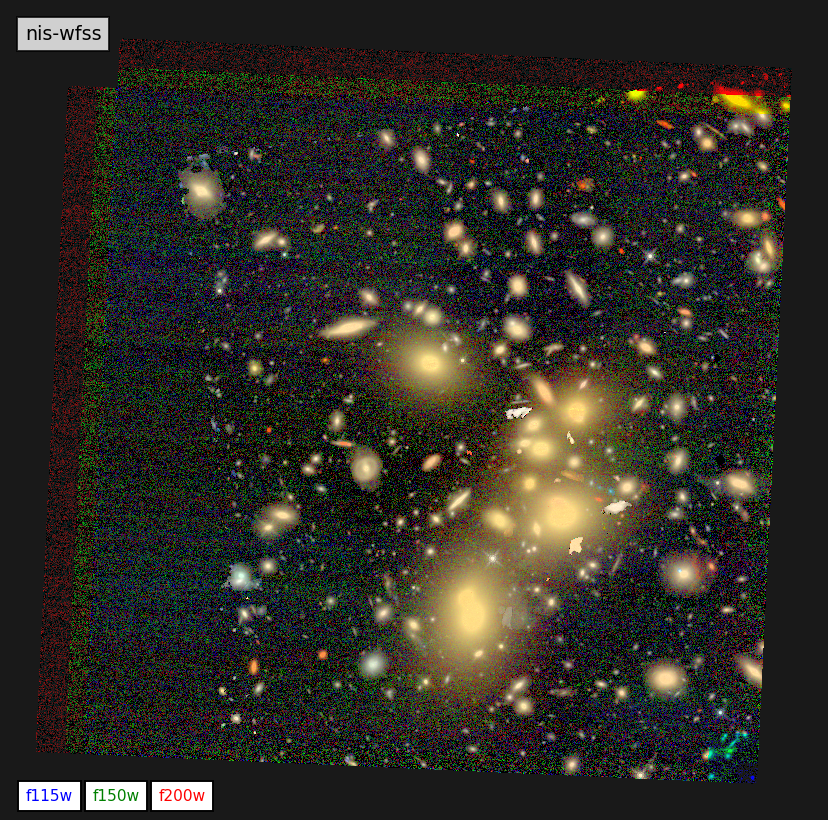

In [35]:
from IPython.display import Image

slx, sly, rgb_filts, fig = auto_script.field_rgb(root=root, scl=8, HOME_PATH=None, xsize=6,
                                                 force_rgb=['f200w','f150w','f115w'], show_ir=False, 
                                                 rgb_scl=[1.65,1.33,1], gzext='*', 
                                                 output_format='png', suffix='.field', 
                                                 full_dimensions=4 # 4x4 in png relative to f444w
                                                )  
plt.close(fig)
    
Image(filename='{0}.field.png'.format(root)) 

# Multiwavelength catalog

Simple matched-aperture photometric catalog across filters with no PSF-matching but a bunch of apertures.  

Output units are `microJansky`

Simple aperture correction with `{band}_total_1 = {band}_flux_aper_1 * flux_auto / flux_aper_1`.

## Catalog detection image

Make a "detection" image combining filters

In [37]:
os.chdir(os.path.join(HOME_PATH, 'Prep'))

auto_script.make_filter_combinations(root, weight_fnu=True, min_count=1,
        filter_combinations={'ir': ['F115W','F150W','F200W','F277W','F356W','F444W']})

nis-wfss-f200w_drz_sci.fits f200w ir 0.1769300030814782 2.0489758828508937
nis-wfss-f115w_drz_sci.fits f115w ir 0.5120935831386575 0.6816989068131475
nis-wfss-f150w_drz_sci.fits f150w ir 0.34083988847047614 1.1505894627294642


/Users/gbrammer/miniconda3/envs/py39-may10/lib/python3.9/site-packages/grizli/pipeline/auto_script.py:3919: RuntimeWarning: invalid value encountered in true_divide
  sci = num[band]/den[band]


Write nis-wfss-ir_drz_sci.fits


## Source detection and aperture photometry

Matched (circular) apertures across bands

In [38]:
utils.set_warnings()

phot = auto_script.multiband_catalog(field_root=root, detection_filter='ir', get_all_filters=True)

# (2022-06-26 10:28:56.823)

auto_script.multiband_catalog(**{'threshold': 1.8, 'detection_background': True, 'photometry_background': True, 'get_all_filters': True, 'filters': None, 'det_err_scale': -inf, 'phot_err_scale': -inf, 'rescale_weight': True, 'run_detection': True, 'detection_filter': 'ir', 'detection_root': None, 'output_root': None, 'use_psf_filter': True, 'detection_params': {'minarea': 9, 'filter_kernel': array([[0.0049, 0.0213, 0.0513, 0.0687, 0.0513, 0.0213, 0.0049],
       [0.0213, 0.0921, 0.2211, 0.296 , 0.2211, 0.0921, 0.0213],
       [0.0513, 0.2211, 0.5307, 0.7105, 0.5307, 0.2211, 0.0513],
       [0.0687, 0.296 , 0.7105, 0.9511, 0.7105, 0.296 , 0.0687],
       [0.0513, 0.2211, 0.5307, 0.7105, 0.5307, 0.2211, 0.0513],
       [0.0213, 0.0921, 0.2211, 0.296 , 0.2211, 0.0921, 0.0213],
       [0.0049, 0.0213, 0.0513, 0.0687, 0.0513, 0.0213, 0.0049]]), 'filter_type': 'conv', 'clean': True, 'clean_param': 1, 'deblend_nthresh': 32, 'deblend_cont': 0.001}, 'phot_apertures'

In [39]:
phot.meta

OrderedDict([('VERSION', ('1.2.0', 'SEP version')),
             ('MINAREA', (9, 'Minimum source area in pixels')),
             ('CLEAN', (True, 'Detection cleaning')),
             ('DEBCONT', (0.001, 'Deblending contrast ratio')),
             ('DEBTHRSH', (32, 'Number of deblending thresholds')),
             ('FILTER_TYPE',
              ('conv', 'Type of filter applied, conv or weight')),
             ('THRESHOLD', (1.8, 'Detection threshold')),
             ('KRONFACT', (2.5, 'Kron radius scale factor')),
             ('KRON0', (2.4, 'Minimum scaled Kron radius')),
             ('KRON1', (3.8, 'Maximum scaled Kron radius')),
             ('MINKRON', (7.000000000000253, 'Minimum Kron aperture, pix')),
             ('TOTCFILT', ('F140W', 'Filter for tot_corr')),
             ('TOTCWAVE', (13922.907, 'PLAM for tot_corr')),
             ('ZP', (26.45236875049394, 'AB zeropoint')),
             ('PLAM', (13922.907, 'Filter pivot wave')),
             ('FNU', (9.5291135e-08, 'Scale to

In [40]:
phot.colnames

['id',
 'thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2_image',
 'y2_image',
 'xy_image',
 'errx2',
 'erry2',
 'errxy',
 'a_image',
 'b_image',
 'theta_image',
 'cxx_image',
 'cyy_image',
 'cxy_image',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag',
 'x_image',
 'y_image',
 'number',
 'ra',
 'dec',
 'x_world',
 'y_world',
 'flux_iso',
 'fluxerr_iso',
 'area_iso',
 'mag_iso',
 'kron_radius',
 'kron_rcirc',
 'flux_auto',
 'fluxerr_auto',
 'bkg_auto',
 'flag_auto',
 'area_auto',
 'flux_radius_flag',
 'flux_radius_20',
 'flux_radius',
 'flux_radius_90',
 'tot_corr',
 'mag_auto',
 'magerr_auto',
 'flux_aper_0',
 'fluxerr_aper_0',
 'flag_aper_0',
 'bkg_aper_0',
 'mask_aper_0',
 'flux_aper_1',
 'fluxerr_aper_1',
 'flag_aper_1',
 'bkg_aper_1',
 'mask_aper_1',
 'flux_aper_2',
 'fluxerr_aper_2',
 'flag_aper_2',
 'bkg_aper_2',
 'mask_aper_2',
 'flux_aper_3',
 'fluxerr_aper_3',
 'flag_aper_3',
 'bkg_aper_3',
 'mask_aper_3',

## Compare astrometry

In [16]:
inp = utils.read_catalog('../abell2744_ip_2008_20220620_g3sw.cat', sextractor=True)

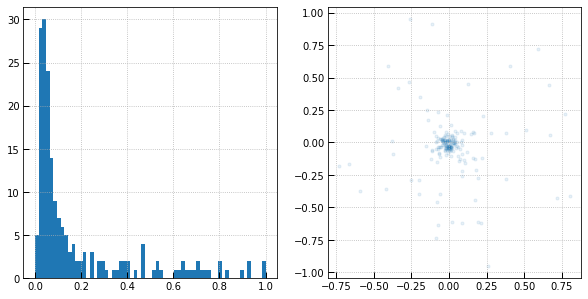

In [42]:
# inp = utils.GTable.read(os.path.join(HOME_PATH, 'CEERS_GM.cat'), format='ascii')
# inp['ra'] = inp['x_or_RA']
# inp['dec'] = inp['y_or_Dec']

idx, dr, dx, dy = inp.match_to_catalog_sky(phot, get_2d_offset=True)
inp = inp[idx]

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(dr.value , bins=np.linspace(0,1,64))

hasm = dr.value < 1

axes[1].scatter(dx.value[hasm], dy.value[hasm], alpha=0.1)

for ax in axes:
    ax.grid()

In [44]:
!ls -1 {root}*dr*fits

nis-wfss-f115w_drz_sci.fits
nis-wfss-f115w_drz_wht.fits
nis-wfss-f150w_drz_sci.fits
nis-wfss-f150w_drz_wht.fits
nis-wfss-f200w_drz_sci.fits
nis-wfss-f200w_drz_wht.fits
nis-wfss-ir_drz_sci.fits
nis-wfss-ir_drz_wht.fits


In [45]:
!ls *cat.fits
# !ln -sf  {root}-f356w.cat.fits {root}-ir.cat.fits

nis-wfss-ir.cat.fits
unknown-01324-001-267.0-nis-f115w-clear.cat.fits
unknown-01324-001-267.0-nis-f150w-clear.cat.fits
unknown-01324-001-267.0-nis-f200w-clear.cat.fits


# Grism model

Using image mosaics as reference, create a full model of the dispersed spectra

**Issue**: The script currently combines everything for a particular *grism*, but should rather combine multiple grisms that use a common blocking filter

In [6]:
from importlib import reload
from grizli import model, multifit, grismconf

os.chdir(os.path.join(HOME_PATH, 'Prep'))
         
if not os.path.exists('../Extractions'):
    os.mkdir('../Extractions')
    
files = glob.glob('*GrismFLT.fits')

if len(files) == 0:
    ### Grism contamination model

    # Which filter to use as direct image?  Will try in order of the list until a match is found.
    grism_prep_args = kwargs['grism_prep_args']
    
    # For now, turn off refining contamination model with polynomial fits
    grism_prep_args['refine_niter'] = 0
    # grism_prep_args['refine_niter'] = 2
    
    # Flat-flambda spectra
    grism_prep_args['init_coeffs'] = [1.0]
    
    grism_prep_args['mask_mosaic_edges'] = False
    
    # Fairly bright for speedup, these can be adjusted based on how deep the spectra/visits are
    grism_prep_args['refine_mag_limits'] = [18,22]
    grism_prep_args['prelim_mag_limit'] = 24
    
    grism_prep_args['gris_ref_filters'] = {'G141': ['F140W', 'F160W'], 
                                           'G102': ['F105W', 'F098M', 'F110W'], 
                                           'GR150R': ['F115W','F150W','F200W'], 
                                           'GR150C': ['F115W','F150W','F200W'], 
                                           'GRISMR':['F356W'], 
                                           'GRISMC':['F356W'],}
    
    grp = auto_script.grism_prep(field_root=root, pad=800, **grism_prep_args)

    grp = multifit.GroupFLT(grism_files=glob.glob('*GrismFLT.fits'), 
                            catalog='{0}-ir.cat.fits'.format(root), 
                            cpu_count=-1, sci_extn=1, pad=800)
    
else:
    os.chdir(os.path.join(HOME_PATH, 'Extractions'))

    grp = multifit.GroupFLT(grism_files=glob.glob('*GrismFLT.fits'), 
                            catalog='{0}-ir.cat.fits'.format(root), 
                            cpu_count=-1, sci_extn=1, pad=800)

Load jw01324001001_01101_00018_nis.01.GrismFLT.fits!


Transform JWST WFSS: flip=True
Load jw01324001001_01101_00019_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_01101_00010_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_01101_00027_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_01101_00035_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_01101_00002_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_01101_00043_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_01101_00026_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_01101_00011_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_01101_00042_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_01101_00003_nis.01.GrismFLT.fits!
Transform JWST WFSS: flip=True
Load jw01324001001_01101_00034_nis.01.GrismFLT.fits!
Transform JWST WFSS: 

In [11]:
# Now in "Extractions"
os.getcwd()

'/Users/gbrammer/Research/grizli/Test/Jwst/NIRISS-WFSS/GRB-Sims/Extractions'

## Previews of combined grism images

In [12]:
jwst_utils.set_quiet_logging(jwst_utils.logging.WARNING)
utils.set_warnings()

files = glob.glob('*grism*png')
if len(files) == 0:
    _ = grp.drizzle_grism_models(root=root, scale=0.08)

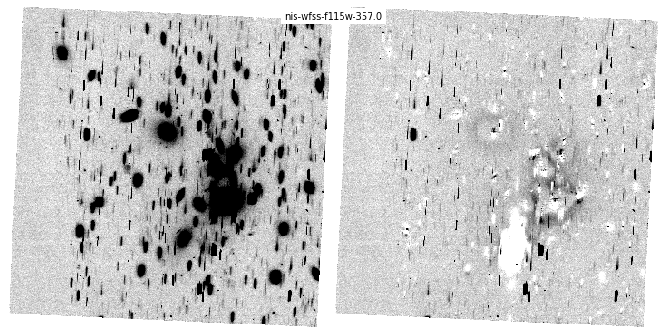

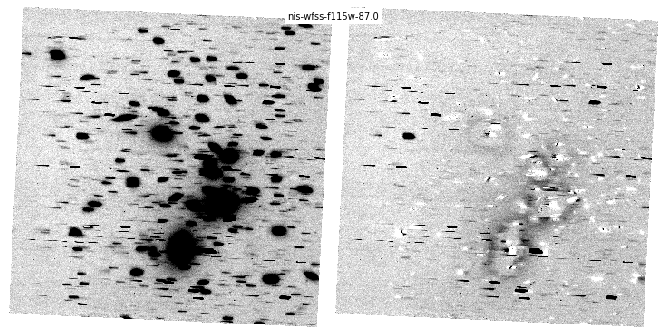

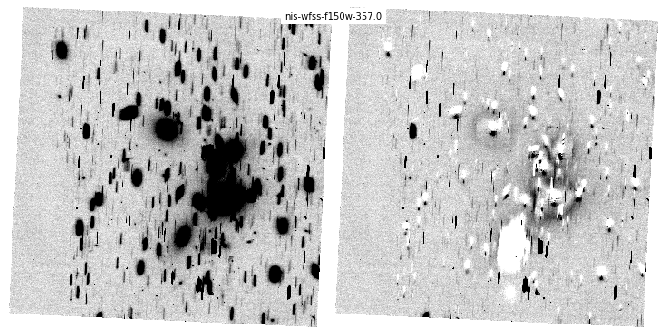

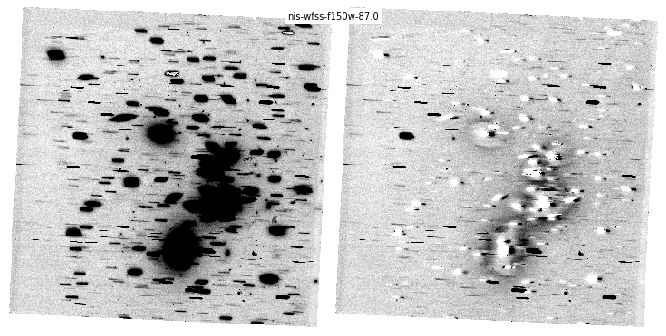

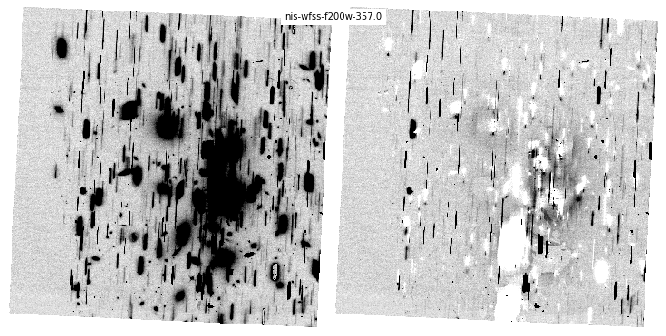

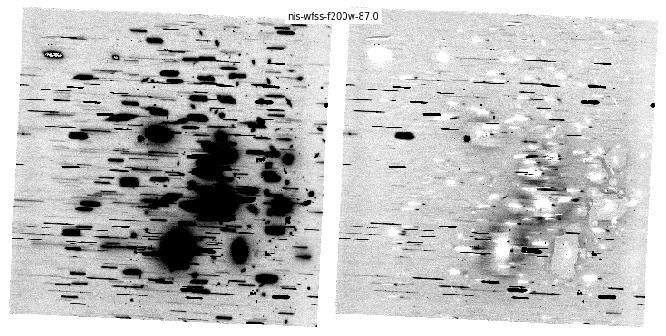

In [53]:
# Show the grism models.  Not great, but ok for simulations
files = glob.glob('*grism*png')
files.sort()

for file in files:
    im = plt.imread(file)
    fig, ax = plt.subplots(1,1,figsize=(12, 12*im.shape[0]/im.shape[1]))
    ax.imshow(im[::-1,:,:])
    ax.axis('off')

In [54]:
grp.PA

{'F150W': {87.0: [0, 1], 357.0: [3, 7]},
 'F115W': {357.0: [2, 8], 87.0: [5, 10]},
 'F200W': {87.0: [4, 11], 357.0: [6, 9]}}

In [13]:
if not os.path.exists('fit_args.npy'):
    pline={'kernel': 'square', 'pixfrac': 0.5, 'pixscale': 0.04, 'size': 8, 'wcs': None}
    args = auto_script.generate_fit_params(pline=pline, field_root=root, min_sens=0.0, min_mask=0.0)

In [14]:
# Look at models in DS9
if False:
    import grizli.ds9
    ds9 = grizli.ds9.DS9()
    i = 6
    ds9.frame(3)
    ds9.view(grp.FLTs[i].grism['SCI'], header=grp.FLTs[i].grism.header)
    ds9.frame(4)
    ds9.view(grp.FLTs[i].model, header=grp.FLTs[i].grism.header)
#     ds9.frame(5)
#     ds9.view(grp.FLTs[i].grism['SCI'], header=grp.FLTs[i].grism.header)
#     ds9.frame(6)
#     ds9.view(grp.FLTs[1].model, header=grp.FLTs[i].grism.header)

# Extract spectra

In [38]:
from grizli import multifit

utils.set_warnings()

#id = 1195

# An object with a line
obj = utils.GTable()
obj['ra'], obj['dec'] = [3.5921799163409047], [-30.38175450173605]

## Extended object with a line
obj['ra'], obj['dec'] = 3.575705078077661, -30.405355659466807

## Another line
# obj['ra'], obj['dec'] = 3.5849640, -30.3928477

## z8
# obj['ra'], obj['dec'] = 3.603863, -30.382261

idx, dr = grp.catalog.match_to_catalog_sky(obj)
id = grp.catalog['NUMBER'][idx][0]

ad_idx, ad_dr = inp.match_to_catalog_sky(obj)

ad_id = inp['NUMBER'][ad_idx][0]

print(f'dr={dr.min():.2f}, Object ID: {id}, astrodeep ID: {ad_id} ({ad_dr.min():.2f})')

#grp.compute_single_model(id)

beams = grp.get_beams(id, size=32, min_mask=0, min_sens=0)
mb = multifit.MultiBeam(beams, fcontam=0.1, min_sens=0, min_mask=0, group_name=root)
mb.PA

dr=0.02 arcsec, Object ID: 414, astrodeep ID: 9705 (0.03 arcsec)


{'F150W': {87.0: [0, 1], 357.0: [3, 6]},
 'F115W': {357.0: [2, 7], 87.0: [4, 9]},
 'F200W': {357.0: [5, 8]}}

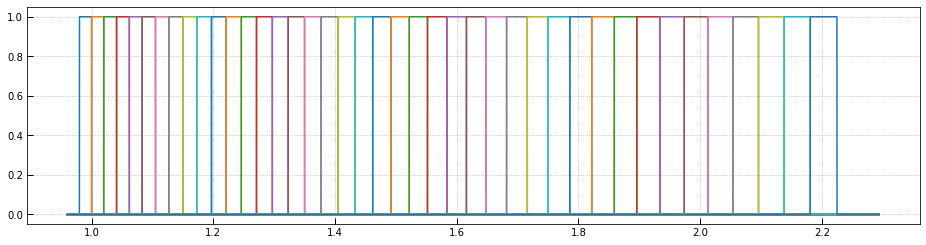

In [76]:
## Polynomial / step templates for empirical fits
wave = np.linspace(8000, 2.3e4, 512)
# cheb = utils.cheb_templates(wave, log=True, order=27)
wstep, cheb = utils.step_templates(wlim=[9800, 2.25e4], R=50)
#cheb = utils.bspline_templates(wave, log=True, degree=18)
fig, ax = plt.subplots(1,1,figsize=(16,4))
for c in cheb:
    ax.plot(cheb[c].wave/1.e4, cheb[c].flux)

ax.grid()

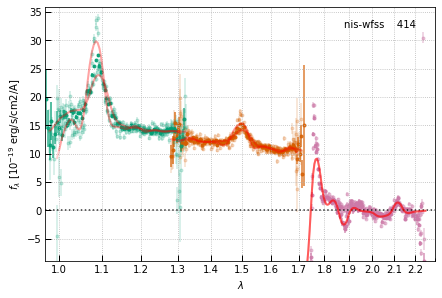

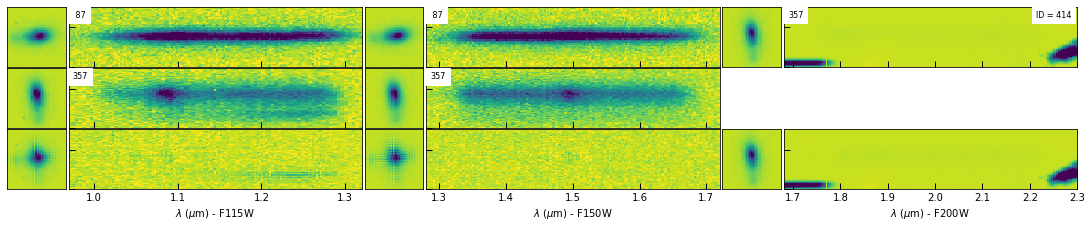

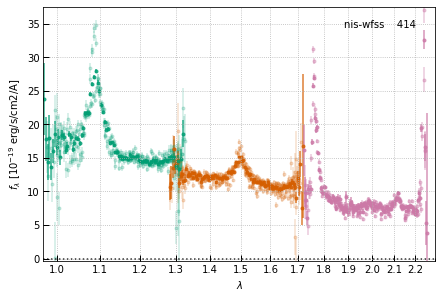

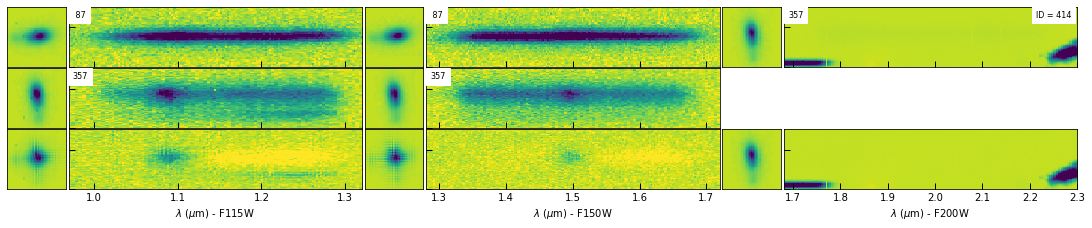

In [77]:
jwst_utils.set_quiet_logging(jwst_utils.logging.WARNING)
utils.set_warnings()

tfit = mb.template_at_z(z=0, templates=cheb, fitter='lstsq')

_ = mb.oned_figure(tfit=tfit)
_ = mb.drizzle_grisms_and_PAs(tfit=tfit, size=38, scale=0.5, diff=True, kernel='square', pixfrac=0.5)

_ = mb.oned_figure()
_ = mb.drizzle_grisms_and_PAs(size=38, scale=0.5, diff=True, kernel='square', pixfrac=0.5)

In [47]:
# Write to file
mb.write_master_fits()

nis-wfss_00414.beams.fits


## Redshift fit

Lines look a bit wierd in simulations

Run id=414 with fit_args.npy
load_master_fits: nis-wfss_00414.beams.fits

 ! Scale NIRISS sensitivity by 0.556 to hack gain correction
 ! and match GLASS MIRAGE simulations. Sensitivity will be updated when
 ! on-sky data available
 
1 jw01324001001_01101_00018_nis_rate.fits GR150R

 ! Scale NIRISS sensitivity by 0.556 to hack gain correction
 ! and match GLASS MIRAGE simulations. Sensitivity will be updated when
 ! on-sky data available
 
2 jw01324001001_01101_00019_nis_rate.fits GR150R

 ! Scale NIRISS sensitivity by 0.556 to hack gain correction
 ! and match GLASS MIRAGE simulations. Sensitivity will be updated when
 ! on-sky data available
 
3 jw01324001001_01101_00010_nis_rate.fits GR150C

 ! Scale NIRISS sensitivity by 0.556 to hack gain correction
 ! and match GLASS MIRAGE simulations. Sensitivity will be updated when
 ! on-sky data available
 
4 jw01324001001_01101_00027_nis_rate.fits GR150C

 ! Scale NIRISS sensitivity by 0.556 to hack gain correction
 ! and match GLASS MIRAGE

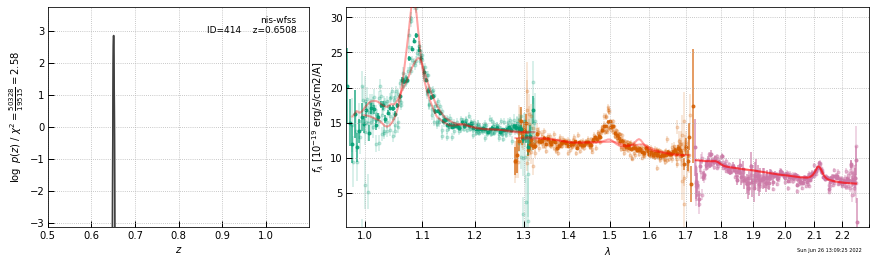

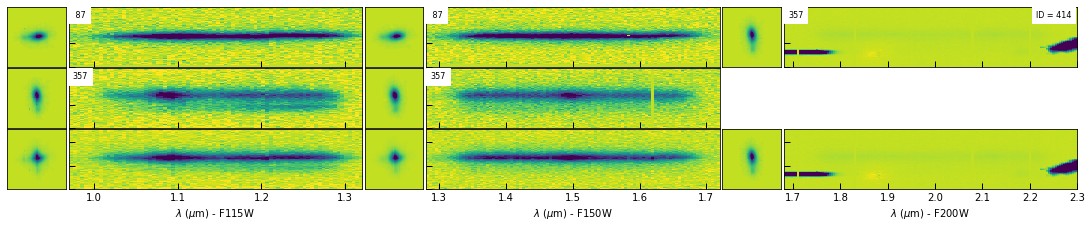

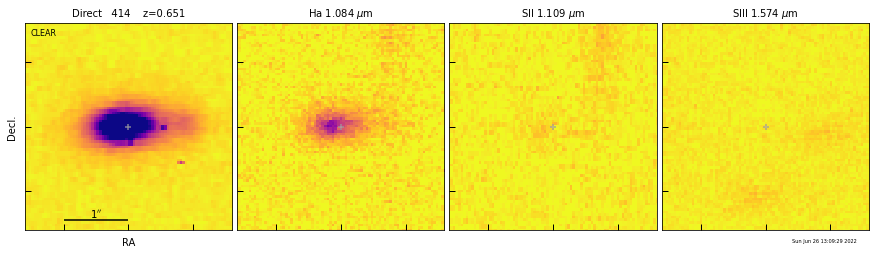

In [68]:
from grizli import fitting
_fit = fitting.run_all_parallel(id, zr=[0.5, 1.1], verbose=True, get_output_data=True)

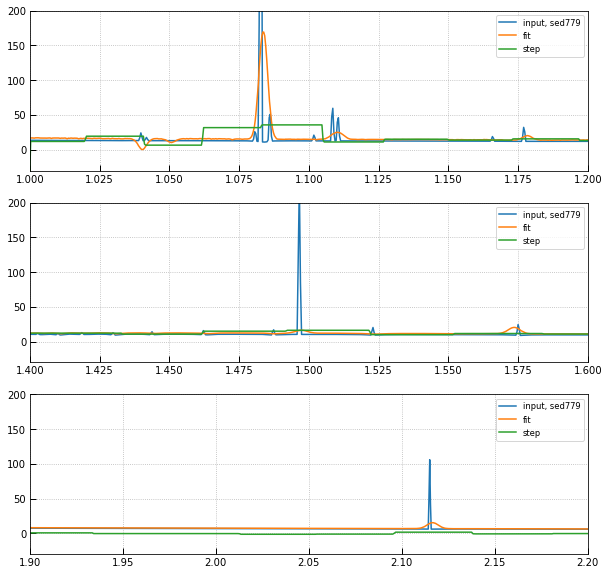

In [78]:
# Compare to the input SED

sed = np.loadtxt('../SED779.dat',unpack=True)
fig, axes = plt.subplots(3,1,figsize=(10,10), sharey=True)
lims = [(1.0, 1.2), (1.4, 1.6), (1.9, 2.2)]

cont = tfit['cont1d']

for i in range(3):
    ax = axes[i]
    ax.plot(sed[0]/1.e4, sed[1], label='input, sed779')

    sp = _fit[3]['line1d']
    ax.plot(sp.wave/1.e4, sp.flux/1.e-19, label='fit')
    ax.plot(cont.wave/1.e4, cont.flux/1.e-19, label='step')

    ax.set_xlim(*lims[i])
    ax.grid()
    ax.set_ylim(-30, 200)
    ax.legend()
